# Deep Learning with Pytorch

Chapter 2: Neural Networks Implementation

In [1]:
import torch

In [2]:
torch.__version__

'1.6.0'

In [3]:
torch.cuda.is_available()

True

In [4]:
x=torch.rand(10) #a tensor vector
x.size()

torch.Size([10])

In [5]:
x

tensor([0.7558, 0.4058, 0.1481, 0.9413, 0.1952, 0.8917, 0.6628, 0.9850, 0.1051,
        0.0490])

In [3]:
temp=torch.FloatTensor([23,224,25,26,27])
temp.size()

torch.Size([5])

In [4]:
from sklearn import datasets
boston=datasets.load_boston()
boston_tensor=torch.from_numpy(boston.data)
boston_tensor.size()

torch.Size([506, 13])

In [5]:
boston_tensor[:2,:]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

torch.Size([224, 224, 3])


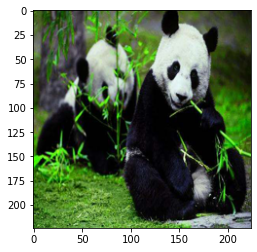

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

panda=np.array(Image.open('panda.jpg').resize((224,224)))
panda_tensor=torch.from_numpy(panda)
print(panda_tensor.size())

plt.imshow(panda)

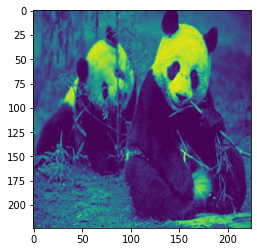

In [7]:
plt.imshow(panda_tensor[:,:,0].numpy()) #convert a tensor into a numpy array.

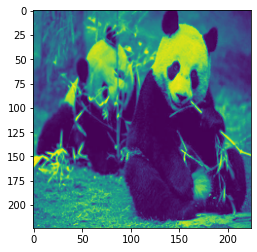

In [8]:
plt.imshow(panda_tensor[:,:,1].numpy())

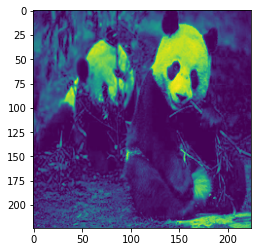

In [9]:
plt.imshow(panda_tensor[:,:,2].numpy())

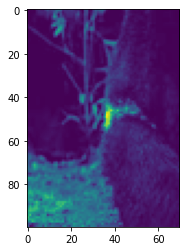

In [10]:
plt.imshow(panda_tensor[100:200,60:130,0].numpy())

In [11]:
sales=torch.eye(3,3)
sales[0,1]

tensor(0.)

In [12]:
sales

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [13]:
from glob import glob
cats=glob('./'+'cat*')
cat_imgs=np.array([np.array(Image.open(cat).resize((224,224))) for cat in cats])
cat_imgs=cat_imgs.reshape(-1,224,224,3)
cat_tensors=torch.from_numpy(cat_imgs)
cat_tensors.size()

torch.Size([2, 224, 224, 3])

In [14]:
cats

['./cat.jpg', './cat1.jpg']

In [16]:
a=torch.rand(2,2)
b=torch.rand(2,2)
c=a+b
d=torch.add(a,b)
print(c==d)

tensor([[True, True],
        [True, True]])


In [17]:
a.add_(5) #plus 5 for each element.

tensor([[5.6267, 5.0996],
        [5.4510, 5.3857]])

In [18]:
a*b #same as following

tensor([[1.3946, 1.5621],
        [4.9947, 0.3533]])

In [19]:
a.mul(b) #same as above

tensor([[1.3946, 1.5621],
        [4.9947, 0.3533]])

In [20]:
%%timeit
a.mul_(b) #same as above

805 ns ± 9.98 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
a=torch.rand(1000,1000)
b=torch.rand(1000,1000)

In [29]:
%%timeit
a.matmul(b)

4.05 ms ± 15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
import time
start=time.clock() ##time the code.
a=a.cuda()
b=b.cuda() ##tramsfer the data onto GPU.
a.matmul(b) ##matrix multiplication
end=time.clock()
print('time:',end-start)

time: 0.018424000000003105


In [31]:
a=np.array([[1,2],
            [3,4]])
b=np.array([[2,3],
            [4,5]])
a=torch.from_numpy(a)
b=torch.from_numpy(b)

print(a.mul(b)) #corresponding elements multiplication.
print()
print(a*b) # same as above.
print()
print(a.matmul(b)) #matrix multiplication.

tensor([[ 2,  6],
        [12, 20]])

tensor([[ 2,  6],
        [12, 20]])

tensor([[10, 13],
        [22, 29]])


In [59]:
from torch.autograd import Variable
x=Variable(torch.ones(2,2),requires_grad=True)
y=x.mean()
print(y)
print(y.backward())
print(x.grad)
print(x.grad_fn)
print(y.grad_fn)

tensor(1., grad_fn=<MeanBackward0>)
None
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])
None


In [56]:
x=Variable(torch.ones(2,2),requires_grad=True)
print(x.grad)

None


In [33]:
type(x)

torch.Tensor

In [36]:
train_x=np.array([1,2,3,4,5,6,7,8,9,10])
x=Variable(torch.from_numpy(train_x).type(torch.FloatTensor),requires_grad=False)
print(x)
print(x.view(10,1))

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])


In [43]:
def get_data():
    train_x=np.array([1,2,3,4,5,6,7,8,9,10])
    train_y=np.array([29,34,56,56,34,567,34,65,87,59])
    dtype=torch.FloatTensor
    x=Variable(torch.from_numpy(train_x).type(dtype),requires_grad=False).view(10,1)
    y=Variable(torch.from_numpy(train_y).type(dtype),requires_grad=False)
    return x,y

def get_weights():
    w=Variable(torch.randn(1),requires_grad=True)
    b=Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred=torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    from math import pow
    loss=(y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None:
            param.grad.data.zero_()
    loss.backward()
    return loss.data

def optimize(learning_rate):
    w.data-=learning_rate*w.grad.data
    b.data-=learning_rate*b.grad.data

In [44]:
x,y=get_data()
w,b=get_weights()
predictions=simple_network(x)
loss=loss_fn(y,predictions)
print(loss)
print(w,b)
optimize(0.001)
print(w,b)

tensor(352054.4688)
tensor([-0.3414], requires_grad=True) tensor([-0.2099], requires_grad=True)
tensor([12.3286], requires_grad=True) tensor([1.8738], requires_grad=True)


In [52]:
a=np.array([1,2,3,4,5])
b=np.array([2,3,4,5,6])
a=torch.from_numpy(a).type(torch.FloatTensor)
b=torch.from_numpy(b).type(torch.FloatTensor)
print(a.norm(1))
print(a.norm(2).pow(2))
print(a.pow(2).sum())

tensor(15.)
tensor(55.0000)
tensor(55.)


In [53]:
torch.randn(2,3) #normal distribution

tensor([[ 0.0365,  0.3877, -1.0664],
        [ 1.2018,  0.9601, -2.1059]])

In [54]:
torch.rand(2,3) #generate random num between [0,1]

tensor([[0.0198, 0.3879, 0.0250],
        [0.4708, 0.0718, 0.8237]])

In [23]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from glob import glob
from PIL import Image

class DogAndCatDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files=glob(root_dir)
        self.size=size
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self,idx):
        img=np.array(Image.open(self.files[idx]).resize(self.size))
        label=self.files[idx].split('/')[-2]
        return img,label
    
dataloader=DataLoader(dogsdset,batch_size=32,num_workers=2)
for imgs,labels in dataloader:
    pass

NameError: name 'dogsdset' is not defined

Chapter 3: More About Neural Networks

In [25]:
from torch.autograd import Variable
from torch.nn import Linear

inp=Variable(torch.randn(1,10)) #using normal distribution.
my_layer=Linear(in_features=10,out_features=5,bias=True) #defining a linear transformation.
print(my_layer(inp))
print(my_layer.weight)
print(my_layer.bias)

tensor([[-0.1628, -0.4819, -0.9911, -0.1864,  0.2478]],
       grad_fn=<AddmmBackward>)
Parameter containing:
tensor([[ 0.2170,  0.0979, -0.1244,  0.1179,  0.1008,  0.1336,  0.0121,  0.2282,
         -0.1063, -0.0660],
        [-0.0719, -0.0267,  0.2724, -0.3002,  0.0900, -0.0783,  0.1894, -0.0772,
         -0.2613,  0.1588],
        [ 0.2734, -0.2357, -0.1286, -0.2621, -0.1289, -0.0387, -0.1139, -0.0322,
          0.1255,  0.1813],
        [-0.1021, -0.0939,  0.0694, -0.2431, -0.1935,  0.2287, -0.0615, -0.1261,
          0.0194,  0.0091],
        [-0.0784,  0.0863,  0.1028,  0.1660,  0.1828, -0.0899, -0.2928,  0.2920,
          0.1994,  0.2097]], requires_grad=True)
Parameter containing:
tensor([ 0.1812,  0.2467,  0.1065, -0.2850,  0.0301], requires_grad=True)


In [26]:
my_layer1=Linear(10,5)
my_layer2=Linear(5,2)
my_layer2(my_layer1(inp))

tensor([[0.4579, 0.0497]], grad_fn=<AddmmBackward>)

In [27]:
from torch.autograd import Variable
from torch.nn import ReLU

sample=Variable(torch.Tensor([[1,2,-1,-1]]))
myReLu=ReLU()
myReLu(sample)

tensor([[1., 2., 0., 0.]])

In [28]:
import torch.nn as nn

class MyFirstNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(MyFirstNN,self).__init__()
        self.layer1=nn.Linear(input_size,hidden_size)
        self.layer2=nn.Linear(hidden_size,output_size)
        
    def __forward__(self,input_data):
        out=self.layer1(input_data)
        out=nn.ReLU(out)
        out=self.layer2(out)
        return out

In [29]:
loss=nn.MSELoss()
inp=Variable(torch.randn(3,5),requires_grad=True)
target=Variable(torch.randn(3,5))
out=loss(inp,target)
out.backward()

In [30]:
def cross_entropy(true_label,prediction):
    if true_label==1:
        return -log(prediction)
    else:
        return -log(-prediction)

In [31]:
loss=nn.CrossEntropyLoss()
inp=Variable(torch.randn(3,5),requires_grad=True)
target=Variable(torch.LongTensor(3).random_(5)) #generate 3 numbers between [0,5].
out=loss(inp,target)
out.backward()

In [32]:
target

tensor([3, 3, 2])

In [35]:
torch.LongTensor(5).random_(9)

tensor([4, 1, 6, 1, 6])

In [36]:
a=[1,2,3]
b=[2,3,4]
for i in [a,b]:
    print(i)

[1, 2, 3]
[2, 3, 4]


In [37]:
a=input("waht's is your name?")

waht's is your name?fan


In [38]:
from torch import optim
from torch.nn import Linear

model=Linear(10,5)
optimizer=optim.SGD(model.parameters(),lr=.01)

for inp,target in dataset:
    optimizer.zero_grad()
    out=model(inp)
    loss=loss_fn(out,target)
    loss.backward()
    optimizer.step()

NameError: name 'dataset' is not defined

In [43]:
from glob import glob
data=glob('./PetImages/*/*.jpg')
print(len(data))

40
['./PetImages/Dog/6.jpg', './PetImages/Dog/18.jpg', './PetImages/Dog/5.jpg', './PetImages/Dog/15.jpg', './PetImages/Dog/12.jpg', './PetImages/Dog/11.jpg', './PetImages/Dog/16.jpg', './PetImages/Dog/0.jpg', './PetImages/Dog/2.jpg', './PetImages/Dog/14.jpg', './PetImages/Dog/9.jpg', './PetImages/Dog/1.jpg', './PetImages/Dog/20.jpg', './PetImages/Dog/19.jpg', './PetImages/Dog/8.jpg', './PetImages/Dog/17.jpg', './PetImages/Dog/13.jpg', './PetImages/Dog/4.jpg', './PetImages/Dog/10.jpg', './PetImages/Cat/3.jpg', './PetImages/Cat/7.jpg', './PetImages/Cat/6.jpg', './PetImages/Cat/18.jpg', './PetImages/Cat/5.jpg', './PetImages/Cat/15.jpg', './PetImages/Cat/12.jpg', './PetImages/Cat/11.jpg', './PetImages/Cat/16.jpg', './PetImages/Cat/0.jpg', './PetImages/Cat/2.jpg', './PetImages/Cat/14.jpg', './PetImages/Cat/9.jpg', './PetImages/Cat/1.jpg', './PetImages/Cat/20.jpg', './PetImages/Cat/19.jpg', './PetImages/Cat/8.jpg', './PetImages/Cat/17.jpg', './PetImages/Cat/13.jpg', './PetImages/Cat/4.jpg', 

In [40]:
from PIL import Image
import numpy  as np

a=np.array([np.array(Image.open(d).resize((224,224))) for d in data[:5]])
print(a)

[[[[157 150 132]
   [158 151 133]
   [158 153 134]
   ...
   [160 154 130]
   [145 142 123]
   [147 146 129]]

  [[155 148 130]
   [157 151 132]
   [158 153 134]
   ...
   [160 154 130]
   [145 143 121]
   [147 146 125]]

  [[156 149 131]
   [157 150 132]
   [156 151 132]
   ...
   [155 149 125]
   [147 146 122]
   [148 148 123]]

  ...

  [[135 149 176]
   [137 151 178]
   [136 151 178]
   ...
   [142 140 119]
   [146 139 121]
   [149 141 123]]

  [[133 147 174]
   [134 148 175]
   [135 150 176]
   ...
   [145 141 121]
   [147 139 122]
   [148 139 122]]

  [[134 148 175]
   [131 145 172]
   [134 149 176]
   ...
   [145 140 120]
   [149 140 122]
   [151 140 124]]]


 [[[140 113 106]
   [162 135 128]
   [138 113 108]
   ...
   [ 20  19  25]
   [ 21  20  26]
   [ 21  20  26]]

  [[139 112 105]
   [163 136 129]
   [143 118 113]
   ...
   [ 18  17  23]
   [ 19  18  24]
   [ 19  18  24]]

  [[138 111 104]
   [159 133 128]
   [149 124 119]
   ...
   [ 19  18  24]
   [ 20  19  25]
   [ 20  19

In [48]:
from glob import glob
import os

dogs=glob('./PetImages/Dog/*.jpg')
n=21
for i in dogs:
    n=n+1
    new_name='%d.jpg'%(n)
    os.rename(i,new_name) 

In [54]:
import os

path='./PetImages/'
files=glob(os.path.join(path,'*/*.jpg'))
print('total num of images is: %d'%(len(files)))
num_images=len(files)
shuffle=np.random.permutation(num_images)

for t in ['train','valid']:
    for folder in ['dog/','cat/']:
        os.makedirs(os.path.join(path,t,folder)) #making multi directories.

for i in shuffle[:15]:
    folder=files[i].split('/')[-1].split('.')[0]
    image=files[i].split('/')[-1]
    os.rename(files[i],str(os.path.join(path,'valid',folder,image)))
    
for j in shuffle[15:]:
    folder=files[j].split('/')[-1].split('.')[0]
    image=files[j].split('/')[-1]
    os.makedirs(os.path.join(path,'valid',folder,image))
    os.rename(files[j],str(os.path.join(path,'train',folder,image)))

total num of images is: 40


FileNotFoundError: [Errno 2] No such file or directory: './PetImages/Cat/13.jpg' -> './PetImages/valid/13/13.jpg'

In [37]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

simple_transform=transforms.Compose([transforms.Scale((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([.485,.456,.406],
                                                         [.229,.224,.225])])
train=ImageFolder('PetImages/train/',simple_transform)
valid=ImageFolder('PetImages/valid/',simple_transform)

In [56]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [57]:
train.classes

['cat', 'dog']

In [58]:
valid.class_to_idx

{'cat': 0, 'dog': 1}

In [59]:
valid.classes

['cat', 'dog']

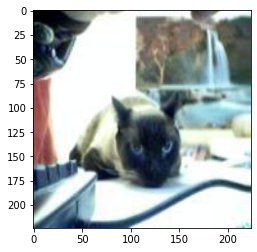

In [68]:
def imshow(inp):
    inp=inp.numpy().transpose((1,2,0)) #transpose the 3d tensor.
    mean=np.array([.485,.456,.406])
    std=np.array([.229,.224,.225])
    inp=std*inp+mean
    inp=np.clip(inp,0,1)
    plt.imshow(inp)
    
imshow(train[9][0])

In [70]:
train[9][0]

tensor([[[-2.0837, -2.0837, -2.0837,  ...,  2.0777,  2.0777,  2.0948],
         [-2.1008, -2.1008, -2.1008,  ...,  2.0263,  2.0263,  2.0434],
         [-2.1179, -2.1179, -2.1179,  ...,  1.9749,  1.9749,  1.9749],
         ...,
         [-0.1657, -0.5596, -0.9877,  ...,  0.9303,  1.0159,  0.9988],
         [-0.5424, -0.9363, -1.3130,  ...,  0.9988,  0.9132,  0.7762],
         [-0.7993, -1.1760, -1.5185,  ...,  1.1015,  0.8789,  0.6392]],

        [[-2.0007, -2.0007, -2.0007,  ...,  2.4286,  2.4286,  2.4286],
         [-2.0182, -2.0182, -2.0182,  ...,  2.4286,  2.4286,  2.4286],
         [-2.0357, -2.0357, -2.0357,  ...,  2.4111,  2.4111,  2.4111],
         ...,
         [ 0.5728,  0.1702, -0.3025,  ...,  2.0259,  2.1310,  2.1134],
         [ 0.1702, -0.2325, -0.6352,  ...,  2.1835,  2.1134,  1.9734],
         [-0.0924, -0.4776, -0.8452,  ...,  2.3235,  2.1134,  1.8683]],

        [[-1.7696, -1.7696, -1.7696,  ...,  2.6400,  2.6400,  2.6400],
         [-1.7870, -1.7870, -1.7870,  ...,  2

In [22]:
shuffle

array([14, 19, 34,  5,  9,  4, 32, 26,  0, 30, 36, 40, 25, 29, 27, 12, 10,
       17, 37, 23, 38, 16,  3, 20,  1, 35, 18, 11, 33, 15,  2, 31,  6, 13,
       22, 28,  7, 39, 21,  8, 24])

In [23]:
os.rename(files[0],'fucku')

In [24]:
files[0]

'./PetImages/Dog/7.jpg'

In [11]:
os.path.join(path,'valid',folder,image)

'./PetImages/valid/19/19.jpg'

In [27]:
os.makedirs(path,'valid',int(folder))
os.rename(files[0],os.path.join(path,'valid',folder,image))

TypeError: an integer is required (got type str)

In [8]:
from numpy import *

help(sort)

Help on function sort in module numpy:

sort(a, axis=-1, kind=None, order=None)
    Return a sorted copy of an array.
    
    Parameters
    ----------
    a : array_like
        Array to be sorted.
    axis : int or None, optional
        Axis along which to sort. If None, the array is flattened before
        sorting. The default is -1, which sorts along the last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort or radix sort under the covers and, in general,
        the actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stable' option was added.
    
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A si

In [73]:
from torch.utils.data import DataLoader

train_data_gen=DataLoader(train,batch_size=64,num_workers=3)
vliad_data_gen=DataLoader(valid,batch_size=64,num_workers=3)

In [78]:
import torchvision.models as models

model_ft=models.resnet18(pretrained=True)
num_ftrs=model_ft.fc.in_features
model_ft.fc=nn.Linear(num_ftrs,2)

if torch.cuda.is_available():
    model_ft=model_ft.cuda()

In [79]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [82]:
import torch.nn as nn
import torch.optim as optim

learning_rate=.001
criterion=nn.CrossEntropyLoss()
optimizer_ft=optim.SGD(model_ft.parameters(),lr=.001,momentum=.9)
exp_lr_scheduler=optim.lr_scheduler.StepLR(optimizer_ft,step_size=7,gamma=.1) #using StepLR as learning rate scheduler

In [97]:
from torch.utils.data import DataLoader

def train_model(model,criterion,optimizer,scheduler,num_epochs=25):
    since=time.time()
    best_model_wts=model.state_dict()
    best_acc=0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1,num_epochs))
        print('-'*10)
        
        for phase in ['train','valid']:
            if phase=='train':
                scheduler.step()
                model.train(True)
            else:
                model.train(False)
            running_loss=0
            running_corrects=0
            
            train_data_gen=DataLoader(train,batch_size=64,num_workers=3)
            valid_data_gen=DataLoader(valid,batch_size=64,num_workers=3)
            dataloaders={'train':train_data_gen,
                       'valid':valid_data_gen}
            
            for data in dataloaders[phase]:
                inputs,labels=data
                
                if torch.cuda.is_available():
                    inputs=Variable(inputs.cuda())
                    labels=Variable(labels.cuda())
                else:
                    inputs,labels=Variable(inputs),Variable(labels)
                optimizer.zero_grad()
                outputs=model(inputs)
                _,preds=torch.max(outputs.data,1)
                loss=criterion(outputs,labels)
                
                if phase=='train':
                    loss.backward()
                    optimizer.step()
                running_loss+=loss.data
                running_corrects+=torch.sum(preds==labels.data)
                
            epoch_loss=running_loss/len(dataloaders[phase])
            epoch_acc=running_corrects/len(dataloaders[phase])
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase,epoch_loss,epoch_acc))
            
            if phase=='valid' and epoch_acc>best_acc:
                best_acc=epoch_acc
                best_model_wts=model.state_dict()
        print()
        
    time_elapsed=time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed//60,time_elapsed%60)) #'//' means floor division.
    print('Best val acc: {:.4f}'.format(best_acc))
        
    model.load_state_dict(best_model_wts)
    return model

In [100]:
model=train_model(model_ft,criterion,optimizer_ft,exp_lr_scheduler,num_epochs=25)

Epoch 1/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 2/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 3/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 4/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 5/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 6/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 7/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 8/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 9/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 10/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 11/25
----------
train Loss: 0.4251 Acc: 19.0000
valid Loss: 0.5052 Acc: 18.0000

Epoch 12/25
----------
train Loss: 0.4251

In [101]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-1.0284e-02, -6.0106e-03, -1.6682e-03,  ...,  5.6724e-02,
                          1.7204e-02, -1.2558e-02],
                        [ 1.1214e-02,  9.6497e-03, -1.0978e-01,  ..., -2.7110e-01,
                         -1.2894e-01,  3.9168e-03],
                        [-6.8144e-03,  5.9234e-02,  2.9566e-01,  ...,  5.1990e-01,
                          2.5652e-01,  6.3805e-02],
                        ...,
                        [-2.7313e-02,  1.6295e-02,  7.2847e-02,  ..., -3.3258e-01,
                         -4.2032e-01, -2.5754e-01],
                        [ 3.0862e-02,  4.1203e-02,  6.3088e-02,  ...,  4.1411e-01,
                          3.9388e-01,  1.6635e-01],
                        [-1.3417e-02, -3.4081e-03, -2.3823e-02,  ..., -1.5040e-01,
                         -8.1895e-02, -5.4308e-03]],
              
                       [[-1.1492e-02, -2.6711e-02, -3.4687e-02,  ...,  3.2503e-02,
                          6.6359

In [102]:
61//60

1

In [104]:
help('//')

Operator precedence
*******************

The following table summarizes the operator precedence in Python, from
lowest precedence (least binding) to highest precedence (most
binding).  Operators in the same box have the same precedence.  Unless
the syntax is explicitly given, operators are binary.  Operators in
the same box group left to right (except for exponentiation, which
groups from right to left).

Note that comparisons, membership tests, and identity tests, all have
the same precedence and have a left-to-right chaining feature as
described in the Comparisons section.

+-------------------------------------------------+---------------------------------------+
| Operator                                        | Description                           |
|=================================================|=======================================|
| "lambda"                                        | Lambda expression                     |
+------------------------------------------------

Chapter 4: Assessing Michine Learning Models

In [35]:
from glob import glob
import os
import numpy as np

path='./PetImages'
files=glob(os.path.join(path,'*/*.jpg'))
num=len(files)
shuffle=np.random.permutation(num)
train=np.array(files)[shuffle[:int(num*0.8)]]
valid=np.array(files)[shuffle[int(num*0.8):]]

In [39]:
type(files)

list

In [24]:
np.shape(files)

(40,)

In [40]:
np.array(files)[[2,3,4,5]]

array(['./PetImages/Dog/31.jpg', './PetImages/Dog/35.jpg',
       './PetImages/Dog/37.jpg', './PetImages/Dog/30.jpg'], dtype='<U22')

In [47]:
import torch
import torch.nn as nn

class Architecture1(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(Architecture1,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,num_classes)
        self.relu=nn.ReLU()
        self.fc3=nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.fc2(out)
        out=self.relu(out)
        out=self.fc3(out)
        return out

In [48]:
class Architecture2(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(Architecture2,self).__init__()
        self.fc1=nn.Liner(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.fc2(out)
        return out

In [56]:
import torch.optim.lr_scheduler as lr

model=Architecture1(10,20,2)
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4,weight_decay=1e-5)
scheduler1=lr.StepLR(optimizer,step_size=30,gamma=0.1)
schedluer2=lr.MultiStepLR(optimizer,milestones=[30,80,150],gamma=0.1)
for epoch in range(100):
    pass

In [59]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.1,momentum=0.9)
scheduler3=lr.ReduceLROnPlateau(optimizer,'min')
scheduler4=lr.ExponentialLR(optimizer,gamma=0.1)

In [60]:
help(lr.ReduceLROnPlateau)

Help on class ReduceLROnPlateau in module torch.optim.lr_scheduler:

class ReduceLROnPlateau(builtins.object)
 |  Reduce learning rate when a metric has stopped improving.
 |  Models often benefit from reducing the learning rate by a factor
 |  of 2-10 once learning stagnates. This scheduler reads a metrics
 |  quantity and if no improvement is seen for a 'patience' number
 |  of epochs, the learning rate is reduced.
 |  
 |  Args:
 |      optimizer (Optimizer): Wrapped optimizer.
 |      mode (str): One of `min`, `max`. In `min` mode, lr will
 |          be reduced when the quantity monitored has stopped
 |          decreasing; in `max` mode it will be reduced when the
 |          quantity monitored has stopped increasing. Default: 'min'.
 |      factor (float): Factor by which the learning rate will be
 |          reduced. new_lr = lr * factor. Default: 0.1.
 |      patience (int): Number of epochs with no improvement after
 |          which learning rate will be reduced. For example

Chapter 5: Computer Vision

In [9]:
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets

transformation=transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize((.1307,),(.3081,))])
train_dataset=datasets.MNIST('./',train=True,transform=transformation,download=True)
test_dataset=datasets.MNIST('./',train=False,transform=transformation,download=True)
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [10]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(builtins.object)
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Arguments:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler, optional): defines the strategy to draw samples from
 |          the dataset. If specified, :attr:`shuffle` must be ``False``.
 |      batch_s

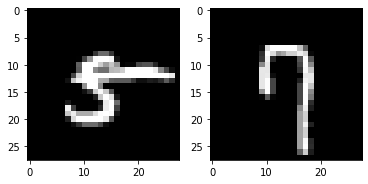

In [14]:
import matplotlib.pyplot as plt

def plot_img(image):
    image=image.numpy()[0]
    mean=.1307
    std=.3081
    image=((mean*image)+std)
    plt.imshow(image,cmap='gray')
    
sample_data=next(iter(train_loader))
plt.subplot(121)
plot_img(sample_data[0][1])
plt.subplot(122)
plot_img(sample_data[0][2])

In [24]:
sample_data[0][1].numpy()[0]

array([[-0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296],
       [-0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.42421296, -0.42421296, -0.42421296, -0.42421296,
        -0.42421296, -0.4242

In [52]:
import torch.nn as nn
import torch.nn.functional as F #########

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320,50)
        self.fc2=nn.Linear(50,10)
        
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)
        return F.log_softmax(x)

In [53]:
import torch
from torch.autograd import Variable

conv=nn.Conv1d(in_channels=1,out_channels=1,kernel_size=3,bias=False)
sample=torch.randn(1,1,7) #one 1-by-7 tensor 
conv(Variable(sample))
conv.weight

Parameter containing:
tensor([[[ 0.5297, -0.1477, -0.4397]]], requires_grad=True)

In [54]:
sample

tensor([[[-0.9008, -0.0951,  0.6357, -1.7335,  0.0308, -1.6321, -0.1627]]])

In [40]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase=='training':
        model.train()
    if phase=='validation':
        model.eval()
        volatile=True
    running_loss=0
    running_correct=0
    for batch_idx,(data,target) in enumerate(data_loader):
        if torch.cuda.is_available():
            data,target=data.cuda(),target.cuda()
            model=model.cuda()
        data,target=Variable(data,volatile),Variable(target)
        if phase=='training':
            optimizer.zero_grad()
        output=model(data)
        loss=F.nll_loss(output,target) #negative log likelihood loss
        running_loss+=F.nll_loss(output,target,size_average=False).data
        preds=output.data.max(dim=1,keepdim=True)[1]
        #compare the equality and return a boolean list, then transfer data onto cpu.
        running_correct+=preds.eq(target.data.view_as(preds)).cpu().sum() 
        if phase=='training':
            loss.backward()
            optimizer.step()
    loss=running_loss/len(data_loader.dataset)
    accuracy=torch.true_divide(100*running_correct,len(data_loader.dataset))
    print('{} loss is {:.2f} and {} accuracy is {:.2f}'.format(phase,loss,phase,accuracy))
    return loss,accuracy

In [68]:
from torch import optim

model=Net()
if torch.cuda.is_available():
    model.cuda()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]
for epoch in range(1,20):
    epoch_loss,epoch_accuracy=fit(epoch,model,train_loader,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,model,test_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

/home/stevenxu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


training loss is 0.65 and training accuracy is 78.00
validation loss is 0.13 and validation accuracy is 96.00
training loss is 0.31 and training accuracy is 90.00
validation loss is 0.09 and validation accuracy is 97.00
training loss is 0.25 and training accuracy is 92.00
validation loss is 0.07 and validation accuracy is 97.00
training loss is 0.22 and training accuracy is 93.00
validation loss is 0.06 and validation accuracy is 98.00
training loss is 0.20 and training accuracy is 94.00
validation loss is 0.06 and validation accuracy is 98.00
training loss is 0.19 and training accuracy is 94.00
validation loss is 0.05 and validation accuracy is 98.00
training loss is 0.17 and training accuracy is 95.00
validation loss is 0.05 and validation accuracy is 98.00
training loss is 0.16 and training accuracy is 95.00
validation loss is 0.05 and validation accuracy is 98.00
training loss is 0.15 and training accuracy is 95.00
validation loss is 0.04 and validation accuracy is 98.00
training l

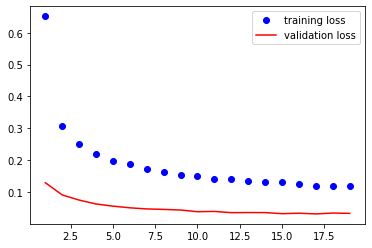

In [73]:
import matplotlib.pyplot as plt

fig=plt.figure()
plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label='training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label='validation loss')
plt.legend() #show the legends.

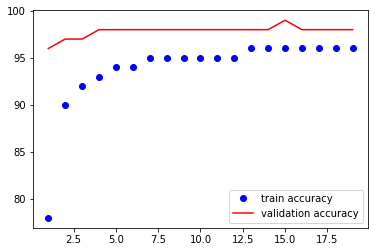

In [75]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label='train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label='validation accuracy')
plt.legend()

In [76]:
help(F.nll_loss)

Help on function nll_loss in module torch.nn.functional:

nll_loss(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
    The negative log likelihood loss.
    
    See :class:`~torch.nn.NLLLoss` for details.
    
    Args:
        input: :math:`(N, C)` where `C = number of classes` or :math:`(N, C, H, W)`
            in case of 2D Loss, or :math:`(N, C, d_1, d_2, ..., d_K)` where :math:`K \geq 1`
            in the case of K-dimensional loss.
        target: :math:`(N)` where each value is :math:`0 \leq \text{targets}[i] \leq C-1`,
            or :math:`(N, d_1, d_2, ..., d_K)` where :math:`K \geq 1` for
            K-dimensional loss.
        weight (Tensor, optional): a manual rescaling weight given to each
            class. If given, has to be a Tensor of size `C`
        size_average (bool, optional): Deprecated (see :attr:`reduction`). By default,
            the losses are averaged over each loss element in the batch. Note that for


In [85]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(56180,500)
        self.fc2=nn.Linear(500,50)
        self.fc3=nn.Linear(50,2)
        
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(x.size(0),-1)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=F.relu(self.fc2(x))
        x=F.dropout(x,training=self.training)
        x=self.fc3(x)
        return F.log_softmax(x,dim=1)

In [93]:
from torch import optim

model=Net()
if torch.cuda.is_available():
    model.cuda()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]
for epoch in range(1,20):
    epoch_loss,epoch_accuracy=fit(epoch,model,train_loader,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,model,test_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

RuntimeError: Given groups=1, weight of size [10, 3, 5, 5], expected input[32, 1, 28, 28] to have 3 channels, but got 1 channels instead

In [84]:
from torchvision import models

vgg=models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/stevenxu/.cache/torch/hub/checkpoints/vgg16-397923af.pth


KeyboardInterrupt: 

In [72]:
for param in vgg.features.parameters():
    param.requires_grad=False

In [73]:
vgg.classifier[6].out_features=2 

In [74]:
optimizer=torch.optim.SGD(vgg.classifier.parameters(),lr=.0001,momentum=.5)

In [75]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

simple_transform=transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([.485,.456,.406],
                                                         [.229,.224,.225])])
train=ImageFolder('PetImages/train/',simple_transform)
valid=ImageFolder('PetImages/valid/',simple_transform)

In [76]:
train_data_loader=torch.utils.data.DataLoader(train,batch_size=32,shuffle=True)
valid_data_loader=torch.utils.data.DataLoader(valid,batch_size=32,shuffle=True)

In [77]:
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]
for epoch in range(1,20):
    epoch_loss,epoch_accuracy=fit(epoch,vgg,train_data_loader,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,vgg,valid_data_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

RuntimeError: CUDA out of memory. Tried to allocate 246.00 MiB (GPU 0; 5.80 GiB total capacity; 4.27 GiB already allocated; 4.00 MiB free; 4.76 GiB reserved in total by PyTorch)

In [23]:
import torch.nn as nn

for layer in vgg.classifier.children():
    if type(layer)==nn.Dropout:
        layer.p=.2
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]
for epoch in range(1,3):
    epoch_loss,epoch_accuracy=fit(epoch,vgg,train_data_loader,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,vgg,valid_data_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

training loss is 0.74 and training accuracy is 0.00
validation loss is 0.87 and validation accuracy is 0.00
training loss is 0.84 and training accuracy is 0.00
validation loss is 0.80 and validation accuracy is 0.00


In [70]:
from torchvision import transforms
from torchvision.datasets import ImageFolder

train_transform=transforms.Compose([transforms.Resize((224,224)),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.RandomRotation(.2),
                                   transforms.ToTensor(),
                                   transforms.Normalize([.485,.456,.406],[.229,.224,.225])])
simple_transform=transforms.Compose([transforms.Scale((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([.485,.456,.406],[.229,.224,.225])])
train=ImageFolder('./PetImages/train/',train_transform)
valid=ImageFolder('./PetImages/valid/',simple_transform)

train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]
for epoch in range(1,3):
    epoch_loss,epoch_accuracy=fit(epoch,vgg,train_data_loader,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,vgg,valid_data_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

RuntimeError: CUDA out of memory. Tried to allocate 246.00 MiB (GPU 0; 5.80 GiB total capacity; 4.62 GiB already allocated; 4.06 MiB free; 4.76 GiB reserved in total by PyTorch)

In [32]:
import numpy as np
from torch.utils.data import DataLoader
from torch.autograd import Variable

vgg=models.vgg16(pretrained=True)
vgg=vgg.cuda()
features=vgg.features

train_data_loader=DataLoader(train,batch_size=32,num_workers=3,shuffle=False)
valid_data_loader=DataLoader(valid,batch_size=32,num_workers=3,shuffle=False)

def preconvfeat(dataset,model):
    conv_features=[]
    labels_list=[]
    for data in dataset:
        inputs,labels=data
        if torch.cuda.is_available():
            inputs=inputs.cuda()
            labels=labels.cuda()
        inputs,labels=Variable(inputs),Variable(labels)
        output=model(inputs)
        conv_features.extend(output.data.cpu().numpy())
        labels_list.extend(labels.data.cpu().numpy())
    conv_features=np.concatenate([[feat] for feat in conv_features])
    return conv_features,labels_list

conv_feat_train,labels_train=preconvfeat(train_data_loader,features)
conv_feat_val,labels_val=preconvfeat(valid_data_loader,features)

In [33]:
from torch.utils.data import Dataset

class My_dataset(Dataset):
    def __init__(self,feat,labels):
        self.conv_feat=feat
        self.labels=labels
        
    def __len__(self):
        return len(self.conv_feat)
    
    def __getitem__(self,idx):
        return self.conv_feat[idx],self.labels[idx]
    

train_feat_dataset=My_dataset(conv_feat_train,labels_train)
val_feat_dataset=My_dataset(conv_feat_val,labels_val)

train_feat_loader=DataLoader(train_feat_dataset,batch_size=64,shuffle=True)
val_feat_loader=DataLoader(val_feat_dataset,batch_size=64,shuffle=True)

In [34]:
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]
for epoch in range(1,20):
    epoch_loss,epoch_accuracy=fit(epoch,vgg.classifier,train_feat_loader,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,vgg.classifier,val_feat_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

RuntimeError: size mismatch, m1: [71680 x 7], m2: [25088 x 4096] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:283

In [53]:
from torchvision import models

vgg=models.vgg16(pretrained=True).cuda()

class LayerActivitions():
    features=None
    def __init__(self,model,layer_num):
        self.hook=model[layer_num].register_forward_hook(self.hook_fn)
        
    def hook_fn(self,module,input,output):
        self.features=output.cpu()
    
    def remove(self):
        self.hook.remove()

for batch_idx,(data,target) in enumerate(train_data_loader):
    if torch.cuda.is_available():
        data,target=data.cuda(),target.cuda()
    img,target=Variable(data),Variable(target)
        
conv_out=LayerActivitions(vgg.features,0)
o=vgg(Variable(img.cuda()))
conv_out.remove()
act=conv_out.features

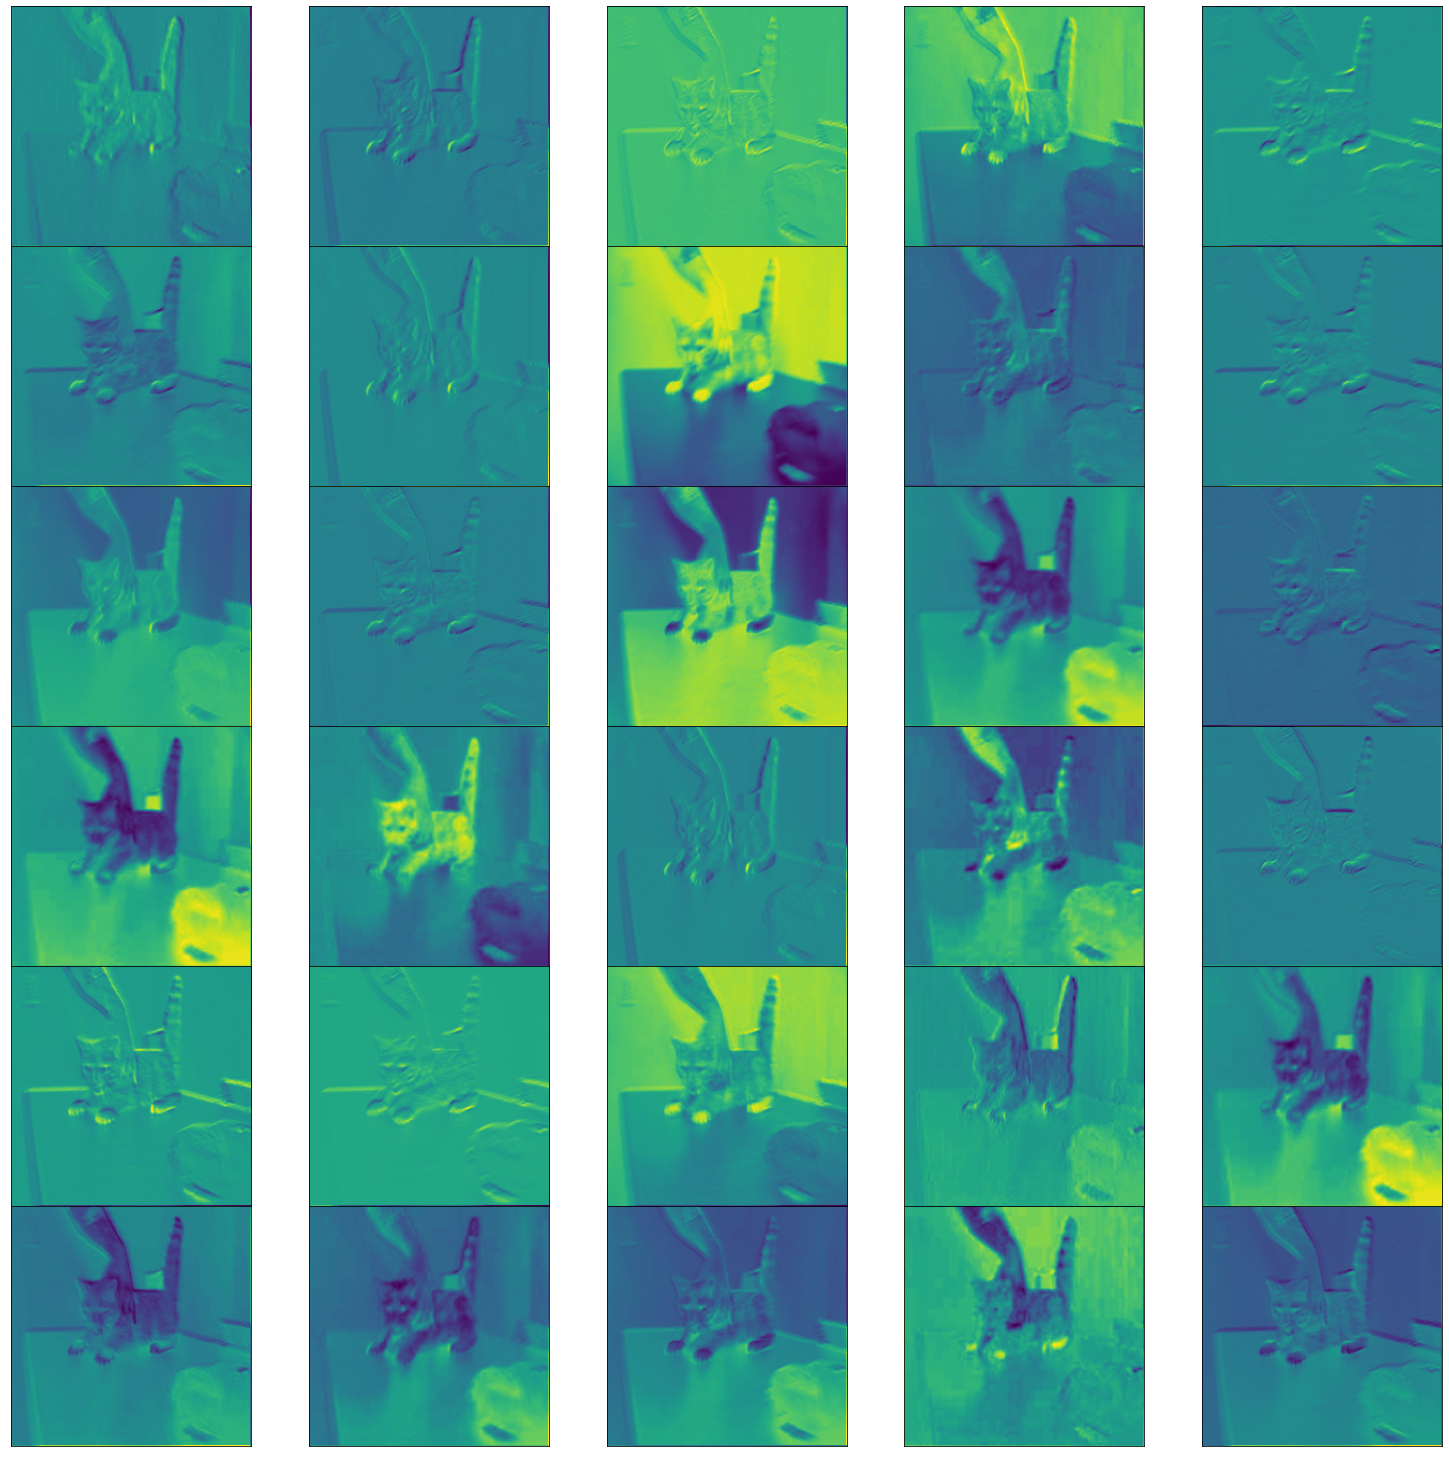

In [55]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=.8,hspace=0,wspace=.2)
for i in range(30):
    ax=fig.add_subplot(12,5,i+1,xticks=[],yticks=[])
    ax.imshow(act[0][i].detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

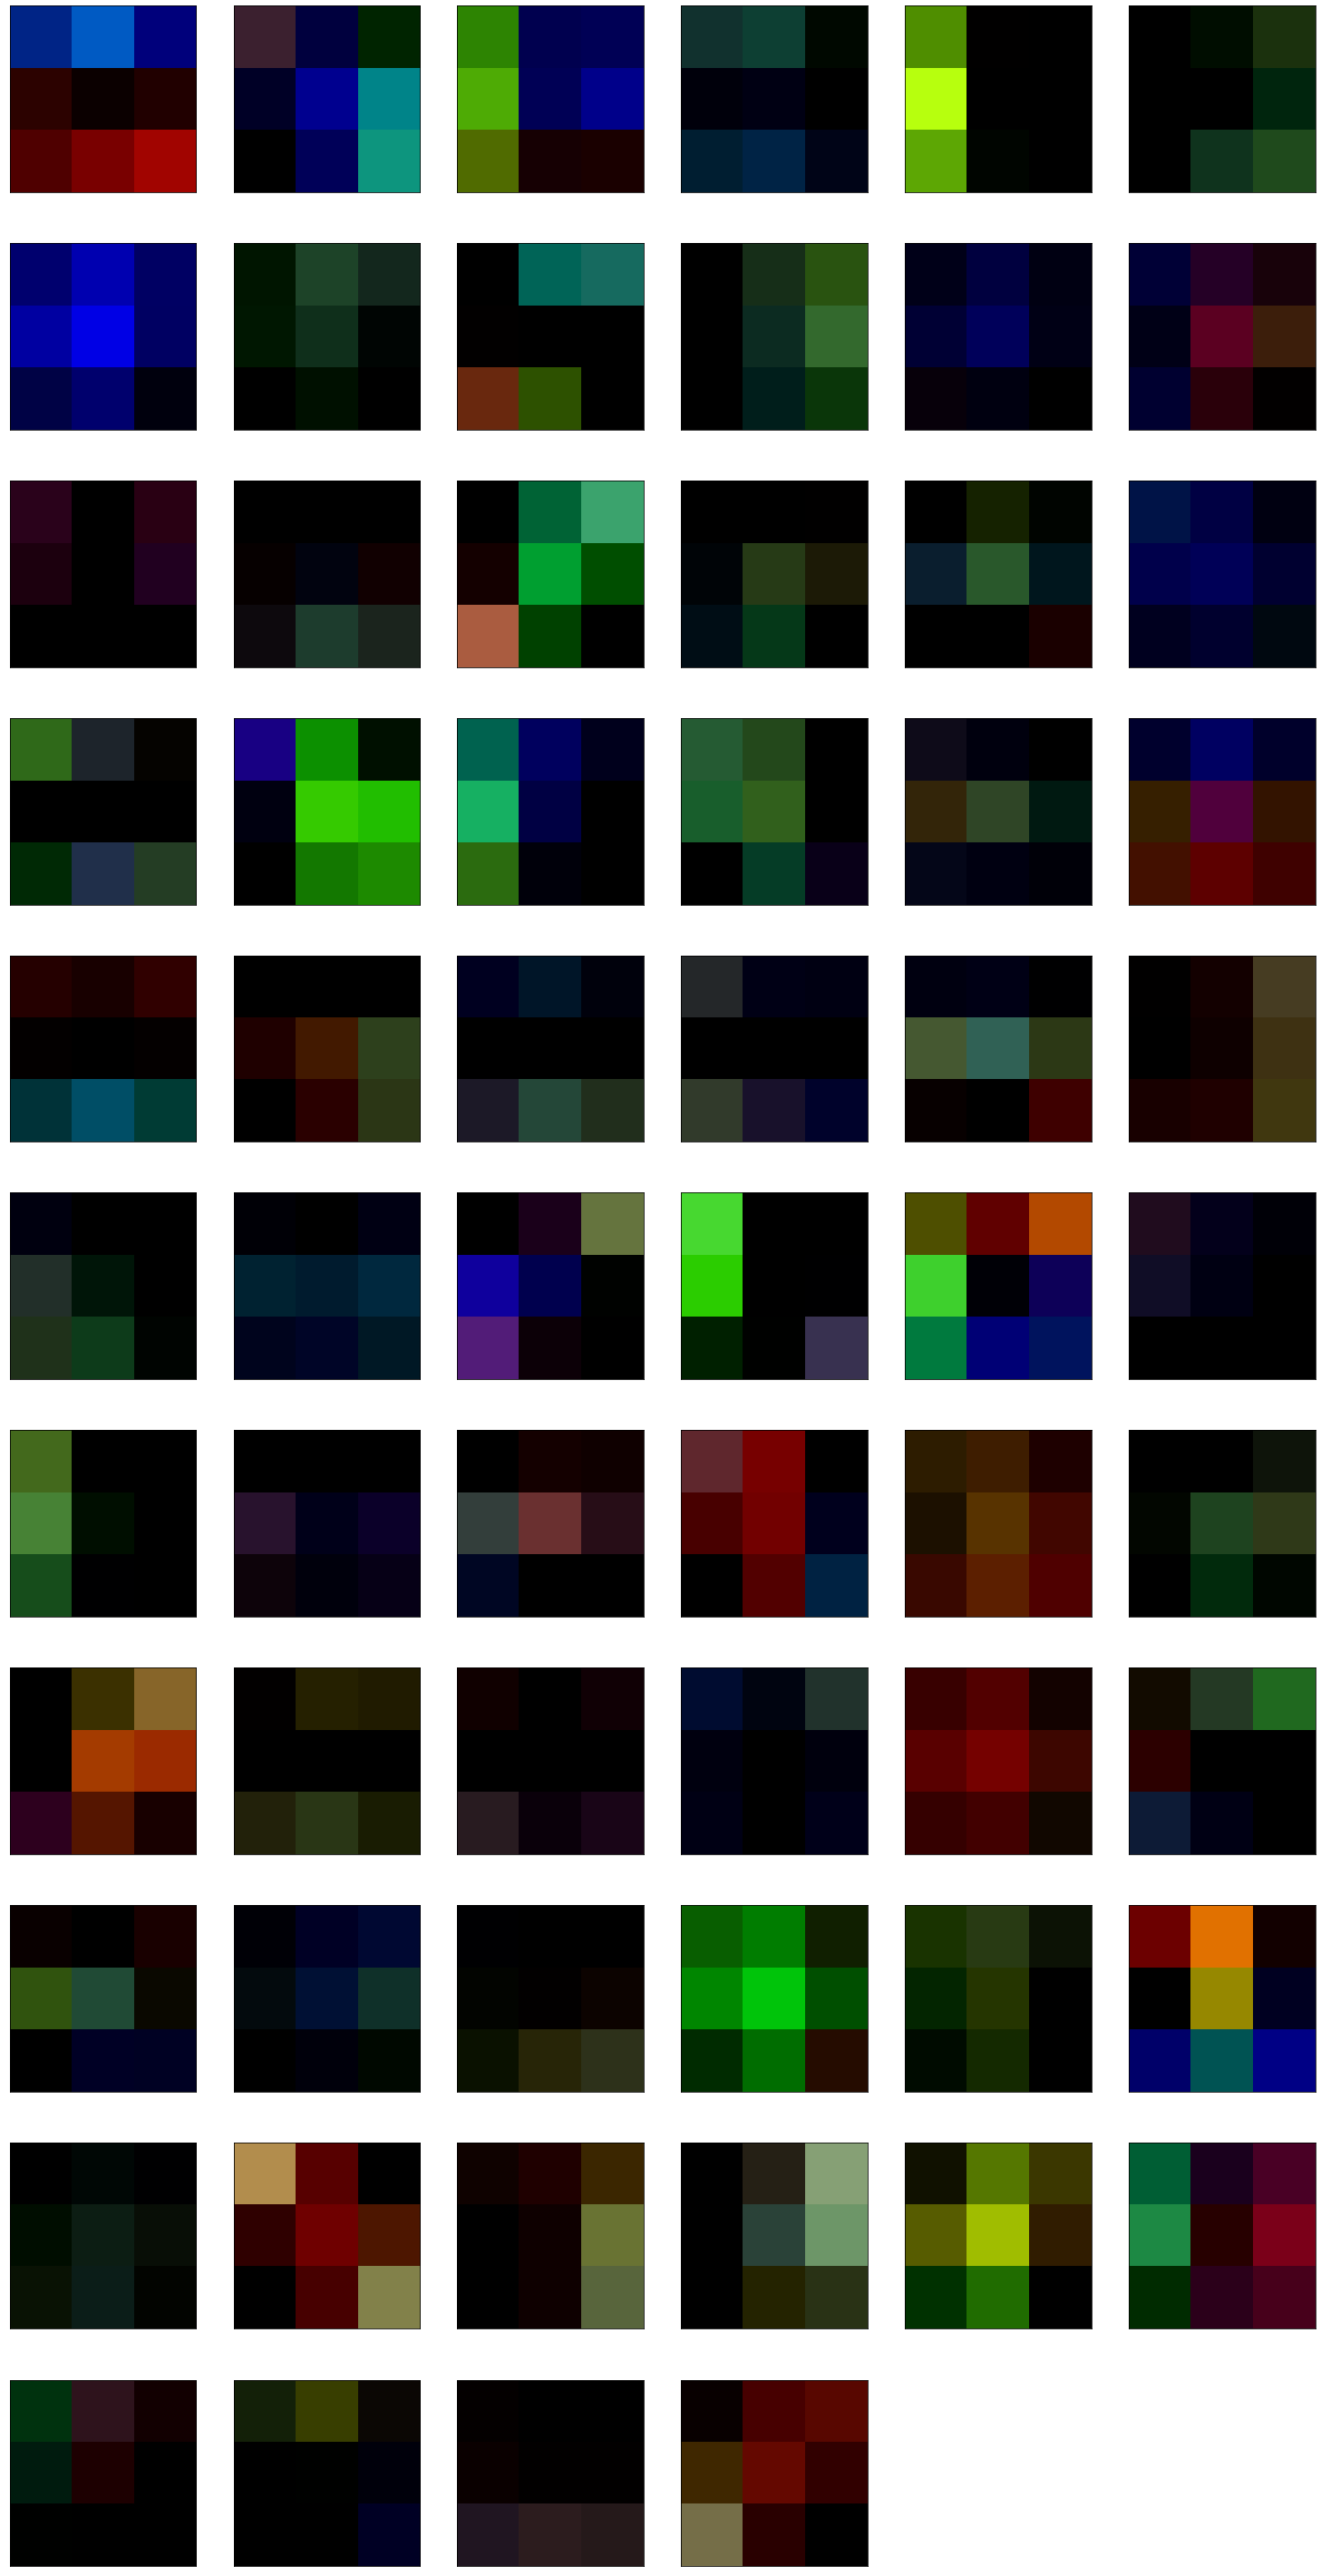

In [68]:
vgg.state_dict().keys()
cnn_weights=vgg.state_dict()['features.0.weight'].cpu()
length=cnn_weights.size()[0]

fig=plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=.8,hspace=0,wspace=.2)
for i in range(length):
    ax=fig.add_subplot(11,6,i+1,xticks=[],yticks=[])
    ax.imshow(cnn_weights[i])

Chapter 6: Deep Learning for Sequential Data and Text Files

In [2]:
thor_review="the action scenes were top notch in this movie. Thor has never been this epic in the MCU. He does\
some pretty epic sh*t in this movie and he is definitely not under-powered anymore. Thor in unleashed in this,\
I love it."

print(list(thor_review))

['t', 'h', 'e', ' ', 'a', 'c', 't', 'i', 'o', 'n', ' ', 's', 'c', 'e', 'n', 'e', 's', ' ', 'w', 'e', 'r', 'e', ' ', 't', 'o', 'p', ' ', 'n', 'o', 't', 'c', 'h', ' ', 'i', 'n', ' ', 't', 'h', 'i', 's', ' ', 'm', 'o', 'v', 'i', 'e', '.', ' ', 'T', 'h', 'o', 'r', ' ', 'h', 'a', 's', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'b', 'e', 'e', 'n', ' ', 't', 'h', 'i', 's', ' ', 'e', 'p', 'i', 'c', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'M', 'C', 'U', '.', ' ', 'H', 'e', ' ', 'd', 'o', 'e', 's', 's', 'o', 'm', 'e', ' ', 'p', 'r', 'e', 't', 't', 'y', ' ', 'e', 'p', 'i', 'c', ' ', 's', 'h', '*', 't', ' ', 'i', 'n', ' ', 't', 'h', 'i', 's', ' ', 'm', 'o', 'v', 'i', 'e', ' ', 'a', 'n', 'd', ' ', 'h', 'e', ' ', 'i', 's', ' ', 'd', 'e', 'f', 'i', 'n', 'i', 't', 'e', 'l', 'y', ' ', 'n', 'o', 't', ' ', 'u', 'n', 'd', 'e', 'r', '-', 'p', 'o', 'w', 'e', 'r', 'e', 'd', ' ', 'a', 'n', 'y', 'm', 'o', 'r', 'e', '.', ' ', 'T', 'h', 'o', 'r', ' ', 'i', 'n', ' ', 'u', 'n', 'l', 'e', 'a', 's', 'h', 'e', 'd', ' ', 'i',

In [3]:
print(thor_review.split())

['the', 'action', 'scenes', 'were', 'top', 'notch', 'in', 'this', 'movie.', 'Thor', 'has', 'never', 'been', 'this', 'epic', 'in', 'the', 'MCU.', 'He', 'doessome', 'pretty', 'epic', 'sh*t', 'in', 'this', 'movie', 'and', 'he', 'is', 'definitely', 'not', 'under-powered', 'anymore.', 'Thor', 'in', 'unleashed', 'in', 'this,I', 'love', 'it.']


In [4]:
from nltk import ngrams

print(list(ngrams(thor_review.split(),2)))

[('the', 'action'), ('action', 'scenes'), ('scenes', 'were'), ('were', 'top'), ('top', 'notch'), ('notch', 'in'), ('in', 'this'), ('this', 'movie.'), ('movie.', 'Thor'), ('Thor', 'has'), ('has', 'never'), ('never', 'been'), ('been', 'this'), ('this', 'epic'), ('epic', 'in'), ('in', 'the'), ('the', 'MCU.'), ('MCU.', 'He'), ('He', 'doessome'), ('doessome', 'pretty'), ('pretty', 'epic'), ('epic', 'sh*t'), ('sh*t', 'in'), ('in', 'this'), ('this', 'movie'), ('movie', 'and'), ('and', 'he'), ('he', 'is'), ('is', 'definitely'), ('definitely', 'not'), ('not', 'under-powered'), ('under-powered', 'anymore.'), ('anymore.', 'Thor'), ('Thor', 'in'), ('in', 'unleashed'), ('unleashed', 'in'), ('in', 'this,I'), ('this,I', 'love'), ('love', 'it.')]


In [5]:
print(list(ngrams(thor_review.split(),3)))

[('the', 'action', 'scenes'), ('action', 'scenes', 'were'), ('scenes', 'were', 'top'), ('were', 'top', 'notch'), ('top', 'notch', 'in'), ('notch', 'in', 'this'), ('in', 'this', 'movie.'), ('this', 'movie.', 'Thor'), ('movie.', 'Thor', 'has'), ('Thor', 'has', 'never'), ('has', 'never', 'been'), ('never', 'been', 'this'), ('been', 'this', 'epic'), ('this', 'epic', 'in'), ('epic', 'in', 'the'), ('in', 'the', 'MCU.'), ('the', 'MCU.', 'He'), ('MCU.', 'He', 'doessome'), ('He', 'doessome', 'pretty'), ('doessome', 'pretty', 'epic'), ('pretty', 'epic', 'sh*t'), ('epic', 'sh*t', 'in'), ('sh*t', 'in', 'this'), ('in', 'this', 'movie'), ('this', 'movie', 'and'), ('movie', 'and', 'he'), ('and', 'he', 'is'), ('he', 'is', 'definitely'), ('is', 'definitely', 'not'), ('definitely', 'not', 'under-powered'), ('not', 'under-powered', 'anymore.'), ('under-powered', 'anymore.', 'Thor'), ('anymore.', 'Thor', 'in'), ('Thor', 'in', 'unleashed'), ('in', 'unleashed', 'in'), ('unleashed', 'in', 'this,I'), ('in', '

In [6]:
import numpy as np

class Dictionary(object):
    def __init__(self):
        self.word2idx={}
        self.idx2word=[]
        self.length=0
        
    def add_word(self,word):
        if word not in self.idx2word:
            self.idx2word.append(word)
            self.word2idx[word]=self.length+1
            self.length+=1
    
    def __len__(self):
        return len(self.idx2word)
    
    def one_hot_encoded(self,word):
        vec=np.zeros(self.length)
        vec[self.word2idx[word]]=1
        return vec

In [7]:
dic=Dictionary()
for tok in thor_review.split():
    dic.add_word(tok)
print(dic.word2idx)

{'the': 1, 'action': 2, 'scenes': 3, 'were': 4, 'top': 5, 'notch': 6, 'in': 7, 'this': 8, 'movie.': 9, 'Thor': 10, 'has': 11, 'never': 12, 'been': 13, 'epic': 14, 'MCU.': 15, 'He': 16, 'doessome': 17, 'pretty': 18, 'sh*t': 19, 'movie': 20, 'and': 21, 'he': 22, 'is': 23, 'definitely': 24, 'not': 25, 'under-powered': 26, 'anymore.': 27, 'unleashed': 28, 'this,I': 29, 'love': 30, 'it.': 31}


In [8]:
dic.one_hot_encoded('were')

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
from tensorflow import keras

imdb=keras.datasets.imdb

In [10]:
from torchtext import data

#lowercase for all text，produce batch size tensor first and max length is 20.
TEXT=data.Field(lower=True,batch_first=True,fix_length=20) 
LABEL=data.Field(sequential=False) #no tokenization applied.

/home/stevenxu/.local/lib/python3.6/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [25]:
help(data.Field)

Help on class Field in module torchtext.data.field:

class Field(RawField)
 |  Defines a datatype together with instructions for converting to Tensor.
 |  
 |  Field class models common text processing datatypes that can be represented
 |  by tensors.  It holds a Vocab object that defines the set of possible values
 |  for elements of the field and their corresponding numerical representations.
 |  The Field object also holds other parameters relating to how a datatype
 |  should be numericalized, such as a tokenization method and the kind of
 |  Tensor that should be produced.
 |  
 |  If a Field is shared between two columns in a dataset (e.g., question and
 |  answer in a QA dataset), then they will have a shared vocabulary.
 |  
 |  Attributes:
 |      sequential: Whether the datatype represents sequential data. If False,
 |          no tokenization is applied. Default: True.
 |      use_vocab: Whether to use a Vocab object. If False, the data in this
 |          field should alrea

In [11]:
import torchtext.datasets as datasets

train,test=datasets.IMDB.splits(TEXT,LABEL) #split data into train and test set

/home/stevenxu/.local/lib/python3.6/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)


In [12]:
help(data.Field.build_vocab)

Help on function build_vocab in module torchtext.data.field:

build_vocab(self, *args, **kwargs)
    Construct the Vocab object for this field from one or more datasets.
    
    Arguments:
        Positional arguments: Dataset objects or other iterable data
            sources from which to construct the Vocab object that
            represents the set of possible values for this field. If
            a Dataset object is provided, all columns corresponding
            to this field are used; individual columns can also be
            provided directly.
        Remaining keyword arguments: Passed to the constructor of Vocab.



In [13]:
print('train fields',train.fields) ###

train fields {'text': <torchtext.data.field.Field object at 0x7fd43d816160>, 'label': <torchtext.data.field.Field object at 0x7fd43d8164e0>}


In [14]:
print(vars(train[0])) ###

{'text': ['wrapped', 'in', 'gorgeous', 'english', 'country', 'backgrounds,', 'emma', 'is', 'a', 'delicious', 'confection', 'to', 'be', 'relished', 'for', 'dreamy', 'getaways.<br', '/><br', '/>emma', '(gwyneth', 'paltrow)', 'is', 'a', 'graceful,', 'intelligent', 'young', 'woman', 'who', 'has', 'just', 'married', 'off', 'her', 'governess--and', 'confidant--to', 'a', 'marriage', 'which', 'emma', 'takes', 'the', 'credit', 'in', 'matchmaking.', 'eager', 'to', 'use', 'her', 'talent', 'in', 'arranging', 'things', 'for', 'the', 'people', 'around', 'her,', 'she', 'decides', 'to', 'match', 'the', 'vicar,', 'mr.', 'elton', '(alan', 'cummings)', 'with', 'her', 'pretty', 'young', 'friend,', 'harriet', '(toni', 'collette).<br', '/><br', '/>the', 'result', 'is', 'a', 'series', 'of', 'mixed', 'signals', 'and', 'mistaken', 'interpretations', 'that', 'end', 'up', 'sorting', 'themselves', 'out,', 'with', 'emma', 'learning', 'that', 'she', 'did', 'not', 'have', 'as', 'much', 'control', 'over', 'events', '

In [15]:
from torchtext.vocab import GloVe
TEXT.build_vocab(train,vectors=GloVe(name='6B',dim=300),max_size=10000,min_freq=10)
LABEL.build_vocab(train)

In [27]:
print(TEXT.vocab.freqs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
print(TEXT.vocab.vectors)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0466,  0.2132, -0.0074,  ...,  0.0091, -0.2099,  0.0539],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.7724, -0.1800,  0.2072,  ...,  0.6736,  0.2263, -0.2919],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [18]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7fd3dfbaec88>>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'that': 11, 'it': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'are': 22, 'not': 23, 'film': 24, 'you': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'all': 35, 'who': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'her': 42, 'about': 43, "it's": 44, 'some': 45, 'if': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'more': 51, 'there': 52, 'she': 53, 'would': 54, 'even': 55, 'good': 56, 'my': 57, 'only': 58, 'their': 59, 'no': 60, 'really': 61, 'had': 62, 'which': 63, 'can': 64, 'up': 65, 'were': 66, 'see': 67, 'than': 68, 'we': 69, '-': 70, 'been': 71, 'into': 72, 'get': 73, 'will': 74, 'story': 75, 'much': 76, 'because': 77, 'most': 78, 'how': 7

In [19]:
import torchtext.data as data

train_iter,test_iter=data.BucketIterator.splits((train,test),batch_size=128,device=None,shuffle=True) 
#device=-1 for cpu, None for gpu

/home/stevenxu/.local/lib/python3.6/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [20]:
batch=next(iter(train_iter))
batch.text

/home/stevenxu/.local/lib/python3.6/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


tensor([[   0,    7,    2,  ...,  209,  304,   16],
        [   2,    0,    7,  ..., 5972,    2,  637],
        [ 625,  340,   10,  ...,  694,  105,   24],
        ...,
        [1800,  493,   10,  ...,   30,  588, 3963],
        [   0,  980,  381,  ...,    2,  327,    5],
        [ 100,   89,   37,  ...,   47,   52,   11]])

In [21]:
batch.label

tensor([2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
        2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
        1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
        1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 1])

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class EmbNet(nn.Module):
    def __init__(self,emb_size,hidden_size1,hidden_size2=400):
        super().__init__()
        self.embedding=nn.Embedding(emb_size,hidden_size1)
        self.fc=nn.Linear(hidden_size2,3)
        
    def forward(self,x):
        embeds=self.embedding(x).view(x.size(0),-1)
        out=self.fc(embeds)
        return F.log_softmax(out,dim=-1)

In [23]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase=='training':
        model.train()
    if phase=='validation':
        model.eval()
        volatile=True
    running_loss=0
    running_correct=0
    for batch_idx,batch in enumerate(data_loader):
        text,target=batch.text,batch.label
        if torch.cuda.is_available():
            text,target=text.cuda(),target.cuda()
            model=model.cuda()
        if phase=='training':
            optimizer.zero_grad()
        output=model(text)
        loss=F.nll_loss(output,target)
        running_loss+=F.nll_loss(output,target,size_average=False).data[0]
        preds=output.data.max(dim=1,keepdim=True)[1]
        running_correct+=preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase=='training':
            loss.backward()
            optimizer.step()
    loss=running_loss/len(data_loader.dataset)
    accuracy=100*running_correct/len(data_loader.dataset)
    print('{} loss is {:.2f} and {} accuracy is {:.2f}'.format(phase,loss,phase,accuracy/100))
    return loss,accuracy

In [31]:
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]

train_iter.repeat=False
test_iter.repeat=False

model=EmbNet(len(TEXT.vocab.stoi),300,400)
optimizer=torch.optim.SGD([param for param in model.parameters()],lr=.001)

for epoch in range(1,10):
    epoch_loss,epoch_accuracy=fit(epoch,model,train_iter,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,model,test_iter,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

RuntimeError: CUDA error: device-side assert triggered

In [28]:
from torchtext.vocab import GloVe

TEXT.build_vocab(train,vectors=GloVe(name='6B',dim=300),max_size=10000,min_freq=10)
LABEL.build_vocab(train)

In [29]:
TEXT.vocab.vectors

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0466,  0.2132, -0.0074,  ...,  0.0091, -0.2099,  0.0539],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.7724, -0.1800,  0.2072,  ...,  0.6736,  0.2263, -0.2919],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [ ]:
model.embedding.weights.data=TEXT.vocab.vectors

In [33]:
class EmbNet(nn.Module):
    def __init__(self,emb_size,hidden_size1,hidden_size2=400):
        super().__init__()
        self.embedding=nn.Embedding(emb_size,hidden_size1)
        self.fc=nn.Linear(hidden_size2,3)
        
    def forward(delf,x):
        embeds=self.embedding(x).view(x.size(),-1)
        out=self.fc(embeds)
        return F.log_softmax(out,dim=-1) #same as dim=2
    
model=EmbNet(len(TEXT.vocab.stoi),300,12000)

In [34]:
model.embedding.weight.requires_grad=False
optimizer=torch.optim.SGD([param for param in model.parameters() if param.requires_grad==True],lr=.001)

In [35]:
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(RNN,self).__init__()
        self.hidden_size=hidden_size
        self.i2h=nn.Linear(input_size+hidden_size,hidden_size)
        delf.i20=nn.Linear(input_size+hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=1)
        
    def forward(self,input,hidden):
        combined=torch.cat((input,hidden),1) #concatenate
        hidden=self.i2h(combined)
        output=self.i2o(combined)
        output=self.softmax(output)
        return output,hidden
    
    def initHidden(self):
        return Variable(torch.zeros(1,self.hidden_size))

In [6]:
help(nn.LogSoftmax)

Help on class LogSoftmax in module torch.nn.modules.activation:

class LogSoftmax(torch.nn.modules.module.Module)
 |  Applies the :math:`\log(\text{Softmax}(x))` function to an n-dimensional
 |  input Tensor. The LogSoftmax formulation can be simplified as:
 |  
 |  .. math::
 |      \text{LogSoftmax}(x_{i}) = \log\left(\frac{\exp(x_i) }{ \sum_j \exp(x_j)} \right)
 |  
 |  Shape:
 |      - Input: :math:`(*)` where `*` means, any number of additional
 |        dimensions
 |      - Output: :math:`(*)`, same shape as the input
 |  
 |  Arguments:
 |      dim (int): A dimension along which LogSoftmax will be computed.
 |  
 |  Returns:
 |      a Tensor of the same dimension and shape as the input with
 |      values in the range [-inf, 0)
 |  
 |  Examples::
 |  
 |      >>> m = nn.LogSoftmax()
 |      >>> input = torch.randn(2, 3)
 |      >>> output = m(input)
 |  
 |  Method resolution order:
 |      LogSoftmax
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Metho

In [37]:
from torchtext import data
from torchtext import datasets

TEXT=data.Field(lower=True,fix_length=200,batch_first=False)
LABEL=data.Field(sequential=False)
train,test=datasets.IMDB.splits(TEXT,LABEL)
TEXT.build_vocab(train,vectors=GloVe(name='6B',dim=300),max_size=10000,min_freq=10)
LABEL.build_vocab(train)

In [55]:
train_iter,test_iter=data.BucketIterator.splits((train,test),batch_size=32,device=torch.device)
train_iter.repeat=False
test_iter.repeat=False

In [56]:
help(data.BucketIterator.splits)

Help on method splits in module torchtext.data.iterator:

splits(datasets, batch_sizes=None, **kwargs) method of builtins.type instance
    Create Iterator objects for multiple splits of a dataset.
    
    Arguments:
        datasets: Tuple of Dataset objects corresponding to the splits. The
            first such object should be the train set.
        batch_sizes: Tuple of batch sizes to use for the different splits,
            or None to use the same batch_size for all splits.
        Remaining keyword arguments: Passed to the constructor of the
            iterator class being used.



In [57]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

class IMDBRnn(nn.Module):
    def __init__(self,vocab,hidden_size,n_cat,bs=1,n1=2):
        super().__init__()
        self.hidden_size=hidden_size
        self.bs=bs
        self.n1=n1
        self.e=nn.Embedding(vocab,hidden_size)
        self.rnn=nn.LSTM(hidden_size,hidden_size,n1)
        self.fc=nn.Linear(hidden_size,n_cat)
        self.softmax=nn.LogSoftmax(dim=-1)
        
    def forward(self,inp):
        bs=inp.size()[1]
        if bs!=self.bs:
            self.bs=bs
        e_out=self.e(inp)
        h0=c0=Variable(e_out.data.new(*(self.n1,self.bs,self.hidden_size)).zero_())
        rnn_o,_=self.rnn(e_out,(h0,c0))
        rnn_o=rnn_o[-1]
        fc1=F.dropout(self.fc(rnn_o),p=.8)
        return self.softmax(fc1)

In [59]:
model=IMDBRnn(200,400,3,bs=32)
#model=model.cuda()

optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

In [60]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase=='training':
        model.train()
    if phase=='validation':
        model.eval() #set the model on evaluation mode.
        volatile=True
    running_loss=0
    running_correct=0
    for batch_idx,r,batch in enumerate(data_loader):
        text,r,target=batch.text,r,batch.label
        if torch.cuda.is_available():
            text,target=text.cuda(),target.cuda()
        if phase=='training':
            optimizer.zero_grad()
        output=model(text)
        loss=F.nll_loss(output,target)
        running_loss+=F.nll_loss(output,target,size_average=False).data[0]
        preds=output.data.max(dim=1,keepdim=True)[1]
        running_correct+=preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase=='training':
            loss.backward()
            optimizer.step()
    loss=running_loss/len(data_loader.dataset)
    accuracy=100*running_correct/len(data_loader.dataset)
    print('{} loss is {:.2f} {} accuracy is {:.2f}'.format(phase,loss,phase,accuracy/100))
    return loss,accuracy

In [61]:
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]

for epoch in range(5):
    epoch_loss,epoch_accuracy=fit(epoch,model,train_iter,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,model,test_iter,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

TypeError: tensor(): argument 'device' must be torch.device, not type

In [62]:
import torch.nn as nn
import torch.nn.functional as F

class IMDBCnn(nn.Module):
    def __init__(self,vocab,hidden_size,n_cat,bs=1,kernel_size=3,max_len=200):
        super().__init__()
        self.hidden_size=hidden_size
        self.bs=bs
        self.e=nn.Embedding(vocab,hidden_size)
        self.cnn=nn.Conv1d(max_len,hidden_size,kernel_size)
        self.avg=nn.AdaptiveAvgPool1d(10)
        self.fc=nn.Linear(1000,n_cat)
        self.softmax=nn.LogSoftmax(dim=-1)
        
    def forward(self,inp):
        bs=inp.size()[0]
        if bs!=self.bs:
            self.bs=bs
        e_out=self.e(inp)
        cnn_o=self.cnn(e_out)
        cnn_avg=self.avg(cnn_o)
        cnn_avg=cnn_avg.view(self.bs,-1)
        fc=F.dropout(self.fc(cnn_avg),p=.5)
        return self.softmax(fc)

In [66]:
model=IMDBCnn(200,400,3,bs=32)
#model=model.cuda()

optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

In [67]:
train_losses,train_accuracy=[],[]
val_losses,val_accuracy=[],[]

for epoch in range(5):
    epoch_loss,epoch_accuracy=fit(epoch,model,train_iter,phase='training')
    val_epoch_loss,val_epoch_accuracy=fit(epoch,model,test_iter,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

TypeError: tensor(): argument 'device' must be torch.device, not type

Chapter 7: Generative Adversarial Network

In [75]:
from torchvision import transforms

imsize=512
is_cuda=torch.cuda.is_available()

prep=transforms.Compose([transforms.Resize(imsize),
                        transforms.ToTensor(),
                        transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]),
                        transforms.Normalize(mean=[.40760392,.45795686,.48501961],
                                            std=[1,1,1]),
                        transforms.Lambda(lambda x: x.mul_(255))])

postpa=transforms.Compose([transforms.Lambda(lambda x: x.mul_(1/255)),
                          transforms.Normalize(mean=[-.40760392,-.45795686,-.48501961],
                                              std=[1,1,1]),
                          transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])])])

postpb=transforms.Compose([transforms.ToPILImage()])

from torch.autograd import Variable
from PIL import Image

def postp(tensor):
    t=postpa(tensor)
    t[t>1]=1
    t[t<0]=0
    img=postpb(t)
    return img

def image_loader(image_name):
    image=Image.open(image_name)
    image=Variable(prep(image))
    image=image.unsqueeze(0) #add a dimension to 0 dim.
    return image

In [92]:
style_img=image_loader('./starry_night.jpg')
content_img=image_loader('./tuebingen.jpg')

In [93]:
optim_img=Variable(content_img.data.clone(),requires_grad=True)

In [120]:
from torchvision import models

vgg=models.vgg19(pretrained=True).features

In [95]:
for param in vgg.parameters():
    param.requires_grad=False

In [96]:
def dummy_fn(img): ########################error
    return img

In [98]:
target_layer=dummy_fn(content_img)
noise_layer=dummy_fn(style_img)
criterion=nn.MSELoss()
content_loss=criterion(target_layer,noise_layer)

/home/stevenxu/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1, 3, 512, 920])) that is different to the input size (torch.Size([1, 3, 512, 682])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (682) must match the size of tensor b (920) at non-singleton dimension 3

In [9]:
import torch.nn as nn

class GramMatrix(nn.Module):
    def forward(self,inp):
        b,c,h,w=inp.size()
        features=inp.view(b,c,h*w)
        gram_matrix=torch.bmm(features,features.transpose(1,2))
        gram_matrix.div_(h*w) #division by h*w
        return gram_matrix

In [10]:
b=torch.randn(3,4)
a=b.div_(4)
print(a)
print(a.mul_(4)==b)

tensor([[ 0.2916, -0.0607, -0.3034, -0.3264],
        [ 0.0853,  0.0044, -0.0586,  0.6215],
        [-0.1486,  0.4161, -0.5301, -0.0312]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [11]:
class StyleLoss(nn.Module):
    def forward(self,inputs,targets):
        out=nn.MSELoss(GramMatrix(inputs),targets)
        return out

In [12]:
class LayerActivitions():
    features=[]
    def __init__(self,model,layer_nums):
        self.hooks=[]
        for layer_num in layer_nums:
            self.hooks.append(model(layer_num).register_forward_hook(self.hook_fn))
            
    def hook_fn(self,module,inp,out):
        self.features.append(out)
        
    def remove(self):
        for hook in self.hooks:
            hook.remove()

In [13]:
def extract_layers(layers,img,model=None):
    la=LayerActivitions(model,layers)
    la.features=[]
    out=model(img)
    la.remove()
    return la.features

In [14]:
a=[1,2,3,4]
a.remove(4)
print(a)

[1, 2, 3]


In [15]:
style_layers = [1,6,11,20,25]
content_layers = [21]
loss_layers=style_layers+content_layers
content_targets=extract_layers(content_layers,content_img,model=vgg)
style_targets=extract_layers(style_layers,style_img,model=vgg)

NameError: name 'content_img' is not defined

In [ ]:
content_targets=[t.detach() for t in content_targets] #detach the ouputs and their parents
style_targets=[GramMatrix(t).detach() for t in style_targets]

In [ ]:
targets=style_targets+content_targets

In [ ]:
style_weights=[1e3/n**2 for n in [64,128,256,512,512]]
content_weights=[1]
weights=style_weights+content_weights

In [ ]:
loss_fns=[StyleLoss()]*len(style_layers)+[nn.MSELoss()]*len(content_layers)
optimizer=torch.optim.LBFGS([opt_img])

In [ ]:
max_iter=500
show_iter=50
n_iter=[0]

def closure():
    optimizer.zero_grad()
    out=extract_layers(loss_layers,opt_img,model=vgg)
    layer_losses=[weights[a]*loss_fns[a](A,targets[a]) for a,A in enumerate(out)]
    loss=sum(layer_losses)
    loss.backward()
    n_iter[0]+=1
    if n_iter[0]%show_iter==show_iter-1:
        print('iteration: %d, loss: %f'%(n_iter[0]+1,loss.data[0]))
    return loss

while n_iter[0]<=max_iter:
    optimizer.step(closure)

In [149]:
np.shape([StyleLoss()]*10)

(10,)

In [5]:
from torchvision import transforms

a=transforms.Normalize((0.9),(1.8))

In [6]:
a(torch.FloatTensor([[[2,3,4],
                     [2,5,7],
                     [4,6,8]]]))

tensor([[[0.6111, 1.1667, 1.7222],
         [0.6111, 2.2778, 3.3889],
         [1.7222, 2.8333, 3.9444]]])

In [7]:
torch.Tensor([[[2]]])

tensor([[[2.]]])

In [16]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.main=nn.Sequential(
            nn.ConvTranspose2d(nz,ngf*8,4,1,0,bias=False),
            nn.BatchNorm2d(ngf*8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf*8,ngf*4,4,2,1,bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf*4,ngf*2,4,2,1,bias=False),
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf*2,ngf,4,2,1,bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf,nc,4,2,1,bias=False),
            nn.Tanh()
        )
        
    def forward(self,inp):
        out=self.main(inp)
        return out
    
def weight_init(m):
    classname=m.__class__.__name__
    if classname.find('Conv')!=-1: #find the begining index of given string in classname， -1 means no match.
        m.weight.data.normal_(0,.02)
    elif classname.find('BatchNorm')!=-1:
        m.weight.data.normal_(1,.02)
        m.bias.data.fill_(0)
nz=100
ngf=64
ndf=64
nc=3

netG=Generator()
netG.apply(weight_init)
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [150]:
help(nn.Sequential)

Help on class Sequential in module torch.nn.modules.container:

class Sequential(torch.nn.modules.module.Module)
 |  A sequential container.
 |  Modules will be added to it in the order they are passed in the constructor.
 |  Alternatively, an ordered dict of modules can also be passed in.
 |  
 |  To make it easier to understand, here is a small example::
 |  
 |      # Example of using Sequential
 |      model = nn.Sequential(
 |                nn.Conv2d(1,20,5),
 |                nn.ReLU(),
 |                nn.Conv2d(20,64,5),
 |                nn.ReLU()
 |              )
 |  
 |      # Example of using Sequential with OrderedDict
 |      model = nn.Sequential(OrderedDict([
 |                ('conv1', nn.Conv2d(1,20,5)),
 |                ('relu1', nn.ReLU()),
 |                ('conv2', nn.Conv2d(20,64,5)),
 |                ('relu2', nn.ReLU())
 |              ]))
 |  
 |  Method resolution order:
 |      Sequential
 |      torch.nn.modules.module.Module
 |      builtins.object
 

In [17]:
netG.__class__.__name__.find('Conv')

-1

In [155]:
help(nn.ReLU)

Help on class ReLU in module torch.nn.modules.activation:

class ReLU(torch.nn.modules.module.Module)
 |  Applies the rectified linear unit function element-wise:
 |  
 |  :math:`\text{ReLU}(x) = (x)^+ = \max(0, x)`
 |  
 |  Args:
 |      inplace: can optionally do the operation in-place. Default: ``False``
 |  
 |  Shape:
 |      - Input: :math:`(N, *)` where `*` means, any number of additional
 |        dimensions
 |      - Output: :math:`(N, *)`, same shape as the input
 |  
 |  .. image:: ../scripts/activation_images/ReLU.png
 |  
 |  Examples::
 |  
 |      >>> m = nn.ReLU()
 |      >>> input = torch.randn(2)
 |      >>> output = m(input)
 |  
 |  
 |    An implementation of CReLU - https://arxiv.org/abs/1603.05201
 |  
 |      >>> m = nn.ReLU()
 |      >>> input = torch.randn(2).unsqueeze(0)
 |      >>> output = torch.cat((m(input),m(-input)))
 |  
 |  Method resolution order:
 |      ReLU
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined her

In [18]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.main=nn.Sequential(
            nn.Conv2d(nc,ndf,4,2,1,bias=False),
            nn.LeakyReLU(.2,inplace=True),
            nn.Conv2d(ndf,ngf*2,4,2,1,bias=False),
            nn.BatchNorm2d(ndf*2),
            nn.LeakyReLU(.2,inplace=True),
            nn.Conv2d(ndf*2,ndf*4,4,2,1,bias=False),
            nn.BatchNorm2d(ndf*4),
            nn.LeakyReLU(.2,inplace=True),
            nn.Conv2d(ndf*4,ndf*8,4,2,1,bias=False),
            nn.BatchNorm2d(ndf*8),
            nn.LeakyReLU(.2,inplace=True),
            nn.Conv2d(ndf*8,1,4,1,0,bias=False),
            nn.Sigmoid()
        )
        
    def forward(self,inp):
        out=self.main(inp)
        return out.view(-1,1).squeeze(1)
    
netD=Discriminator()
netD.apply(weight_init)
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [19]:
import torch.optim as optim

lr=.0002
beta1=.5
criterion=nn.BCELoss()

optimizerD=optim.Adam(netD.parameters(),lr,betas=(beta1,.999))
optimizerG=optim.Adam(netG.parameters(),lr,betas=(beta1,.999))

In [30]:
import torchvision.datasets as datasets

img_size = 64
batch_size=64
niter=25
inp = torch.FloatTensor(batch_size, 3, img_size, img_size)
noise = torch.FloatTensor(batch_size, nz, 1, 1)
fixed_noise = torch.FloatTensor(batch_size, nz, 1, 1).normal_(0, 1)
label = torch.FloatTensor(batch_size)
real_label = 1
fake_label = 0

inp = torch.FloatTensor(batch_size, 3, img_size, img_size)
label = torch.FloatTensor(batch_size)

dataset = datasets.CIFAR10(root = 'data',download=False,
                       transform=transforms.Compose([
                           transforms.Resize(img_size),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                       ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size,
                                         shuffle=True)

In [42]:
from torch.autograd import Variable
import torchvision.utils as utils

for epoch in range(niter):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()
        real_cpu, _ = data
        batch_size = real_cpu.size(0)
        if torch.cuda.is_available():
            real_cpu = real_cpu.cuda()
        inp.resize_as_(real_cpu).copy_(real_cpu)
        label.resize_(batch_size).fill_(real_label)
        inputv = Variable(inp)
        labelv = Variable(label)

        output = netD(inputv)
        errD_real = criterion(output, labelv)
        errD_real.backward()
        D_x = output.data.mean()

        
        noise.resize_(batch_size, nz, 1, 1).normal_(0, 1)
        noisev = Variable(noise)
        fake = netG(noisev)
        labelv = Variable(label.fill_(fake_label))
        output = netD(fake.detach()) #provent to get the gradient of fake.
        errD_fake = criterion(output, labelv)
        errD_fake.backward()
        D_G_z1 = output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step()
        
        netG.zero_grad()
        labelv = Variable(label.fill_(real_label))  
        output = netD(fake)
        errG = criterion(output, labelv)
        errG.backward()
        D_G_z2 = output.data.mean()
        optimizerG.step()

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, niter, i, len(dataloader),
                 errD.data, errG.data, D_x, D_G_z1, D_G_z2))
        if i % 100 == 0:
            utils.save_image(real_cpu,
                    './real_samples.png',
                    normalize=True)
            fake = netG(fixed_noise)
            utils.save_image(fake.data,
                    './fake_samples_epoch_%03d.png' % (epoch),
                    normalize=True)

[0/25][0/782] Loss_D: 42.0976 Loss_G: 13.6728 D(x): 0.0000 D(G(z)): 0.0000 / 0.0326
[0/25][1/782] Loss_D: 22.7146 Loss_G: 21.2838 D(x): 0.1917 D(G(z)): 0.0167 / 0.0554
[0/25][2/782] Loss_D: 14.8317 Loss_G: 28.1918 D(x): 0.5362 D(G(z)): 0.2465 / 0.0000
[0/25][3/782] Loss_D: 10.4873 Loss_G: 7.4855 D(x): 0.4732 D(G(z)): 0.0000 / 0.0012
[0/25][4/782] Loss_D: 3.4616 Loss_G: 0.0095 D(x): 0.6023 D(G(z)): 0.0167 / 0.9906
[0/25][5/782] Loss_D: 5.7612 Loss_G: 16.7103 D(x): 0.9297 D(G(z)): 0.9957 / 0.0000
[0/25][6/782] Loss_D: 0.5164 Loss_G: 20.6882 D(x): 0.7903 D(G(z)): 0.0000 / 0.0000
[0/25][7/782] Loss_D: 0.7786 Loss_G: 20.4726 D(x): 0.8044 D(G(z)): 0.0000 / 0.0000
[0/25][8/782] Loss_D: 1.2984 Loss_G: 16.9851 D(x): 0.7410 D(G(z)): 0.0000 / 0.0000
[0/25][9/782] Loss_D: 0.7123 Loss_G: 12.1733 D(x): 0.8247 D(G(z)): 0.0000 / 0.0000
[0/25][10/782] Loss_D: 0.0392 Loss_G: 8.5892 D(x): 0.9627 D(G(z)): 0.0000 / 0.0002
[0/25][11/782] Loss_D: 0.0772 Loss_G: 5.3342 D(x): 0.9494 D(G(z)): 0.0011 / 0.0050
[0

[0/25][99/782] Loss_D: 0.0368 Loss_G: 6.9693 D(x): 0.9794 D(G(z)): 0.0151 / 0.0050
[0/25][100/782] Loss_D: 0.0424 Loss_G: 6.4881 D(x): 0.9857 D(G(z)): 0.0270 / 0.0043
[0/25][101/782] Loss_D: 0.1629 Loss_G: 7.6506 D(x): 0.9770 D(G(z)): 0.0659 / 0.0039
[0/25][102/782] Loss_D: 0.0380 Loss_G: 7.5509 D(x): 0.9766 D(G(z)): 0.0135 / 0.0027
[0/25][103/782] Loss_D: 0.0655 Loss_G: 6.3993 D(x): 0.9652 D(G(z)): 0.0181 / 0.0038
[0/25][104/782] Loss_D: 0.1034 Loss_G: 8.2594 D(x): 0.9859 D(G(z)): 0.0816 / 0.0004
[0/25][105/782] Loss_D: 0.0548 Loss_G: 7.9220 D(x): 0.9609 D(G(z)): 0.0122 / 0.0008
[0/25][106/782] Loss_D: 0.0354 Loss_G: 6.5566 D(x): 0.9734 D(G(z)): 0.0071 / 0.0025
[0/25][107/782] Loss_D: 0.1306 Loss_G: 9.8944 D(x): 0.9808 D(G(z)): 0.1009 / 0.0006
[0/25][108/782] Loss_D: 0.2774 Loss_G: 7.1066 D(x): 0.9035 D(G(z)): 0.0046 / 0.0026
[0/25][109/782] Loss_D: 0.1854 Loss_G: 9.1624 D(x): 0.9559 D(G(z)): 0.0818 / 0.0017
[0/25][110/782] Loss_D: 0.0503 Loss_G: 8.7523 D(x): 0.9673 D(G(z)): 0.0102 / 

[0/25][197/782] Loss_D: 0.1174 Loss_G: 5.9514 D(x): 0.9682 D(G(z)): 0.0540 / 0.0043
[0/25][198/782] Loss_D: 0.1763 Loss_G: 7.5177 D(x): 0.9820 D(G(z)): 0.1150 / 0.0025
[0/25][199/782] Loss_D: 0.1107 Loss_G: 6.7000 D(x): 0.9238 D(G(z)): 0.0093 / 0.0050
[0/25][200/782] Loss_D: 0.0686 Loss_G: 6.5707 D(x): 0.9693 D(G(z)): 0.0324 / 0.0064
[0/25][201/782] Loss_D: 0.0656 Loss_G: 6.5309 D(x): 0.9827 D(G(z)): 0.0451 / 0.0047
[0/25][202/782] Loss_D: 0.0556 Loss_G: 6.1322 D(x): 0.9784 D(G(z)): 0.0308 / 0.0047
[0/25][203/782] Loss_D: 0.1065 Loss_G: 7.0595 D(x): 0.9717 D(G(z)): 0.0714 / 0.0018
[0/25][204/782] Loss_D: 0.0618 Loss_G: 6.7679 D(x): 0.9651 D(G(z)): 0.0224 / 0.0028
[0/25][205/782] Loss_D: 0.0855 Loss_G: 6.6978 D(x): 0.9685 D(G(z)): 0.0441 / 0.0022
[0/25][206/782] Loss_D: 0.0635 Loss_G: 6.9016 D(x): 0.9785 D(G(z)): 0.0392 / 0.0017
[0/25][207/782] Loss_D: 0.1218 Loss_G: 5.7654 D(x): 0.9322 D(G(z)): 0.0339 / 0.0039
[0/25][208/782] Loss_D: 0.2890 Loss_G: 10.8082 D(x): 0.9775 D(G(z)): 0.2182 

[0/25][295/782] Loss_D: 0.0657 Loss_G: 5.3396 D(x): 0.9694 D(G(z)): 0.0317 / 0.0079
[0/25][296/782] Loss_D: 0.1085 Loss_G: 5.0635 D(x): 0.9586 D(G(z)): 0.0518 / 0.0096
[0/25][297/782] Loss_D: 0.1793 Loss_G: 4.9658 D(x): 0.9210 D(G(z)): 0.0712 / 0.0108
[0/25][298/782] Loss_D: 0.1027 Loss_G: 5.3315 D(x): 0.9444 D(G(z)): 0.0415 / 0.0070
[0/25][299/782] Loss_D: 0.1274 Loss_G: 6.0681 D(x): 0.9607 D(G(z)): 0.0790 / 0.0035
[0/25][300/782] Loss_D: 0.0916 Loss_G: 5.7006 D(x): 0.9264 D(G(z)): 0.0110 / 0.0050
[0/25][301/782] Loss_D: 0.0785 Loss_G: 4.9246 D(x): 0.9586 D(G(z)): 0.0318 / 0.0109
[0/25][302/782] Loss_D: 0.1512 Loss_G: 6.9365 D(x): 0.9659 D(G(z)): 0.0894 / 0.0015
[0/25][303/782] Loss_D: 0.1335 Loss_G: 6.2601 D(x): 0.9074 D(G(z)): 0.0056 / 0.0029
[0/25][304/782] Loss_D: 0.1258 Loss_G: 4.0168 D(x): 0.9369 D(G(z)): 0.0253 / 0.0275
[0/25][305/782] Loss_D: 0.0994 Loss_G: 5.8991 D(x): 0.9848 D(G(z)): 0.0775 / 0.0035
[0/25][306/782] Loss_D: 0.0630 Loss_G: 5.9256 D(x): 0.9623 D(G(z)): 0.0199 /

[0/25][393/782] Loss_D: 0.0623 Loss_G: 6.7041 D(x): 0.9732 D(G(z)): 0.0251 / 0.0024
[0/25][394/782] Loss_D: 0.0987 Loss_G: 7.7847 D(x): 0.9850 D(G(z)): 0.0746 / 0.0010
[0/25][395/782] Loss_D: 0.0803 Loss_G: 6.4382 D(x): 0.9529 D(G(z)): 0.0187 / 0.0039
[0/25][396/782] Loss_D: 0.1333 Loss_G: 4.9857 D(x): 0.9242 D(G(z)): 0.0218 / 0.0152
[0/25][397/782] Loss_D: 0.3937 Loss_G: 10.0400 D(x): 0.9798 D(G(z)): 0.2710 / 0.0001
[0/25][398/782] Loss_D: 0.9481 Loss_G: 2.0439 D(x): 0.5444 D(G(z)): 0.0007 / 0.3416
[0/25][399/782] Loss_D: 1.3247 Loss_G: 10.2577 D(x): 0.9960 D(G(z)): 0.3969 / 0.0009
[0/25][400/782] Loss_D: 0.5850 Loss_G: 8.6034 D(x): 0.8151 D(G(z)): 0.0027 / 0.0058
[0/25][401/782] Loss_D: 0.2059 Loss_G: 6.6423 D(x): 0.8921 D(G(z)): 0.0089 / 0.0203
[0/25][402/782] Loss_D: 0.1097 Loss_G: 5.6551 D(x): 0.9435 D(G(z)): 0.0371 / 0.0253
[0/25][403/782] Loss_D: 0.1490 Loss_G: 6.1531 D(x): 0.9756 D(G(z)): 0.0931 / 0.0072
[0/25][404/782] Loss_D: 0.0375 Loss_G: 6.5584 D(x): 0.9816 D(G(z)): 0.0173

[0/25][491/782] Loss_D: 0.1618 Loss_G: 6.6869 D(x): 0.9430 D(G(z)): 0.0807 / 0.0019
[0/25][492/782] Loss_D: 0.2715 Loss_G: 4.8587 D(x): 0.8697 D(G(z)): 0.0325 / 0.0118
[0/25][493/782] Loss_D: 0.2563 Loss_G: 8.0178 D(x): 0.9710 D(G(z)): 0.1797 / 0.0005
[0/25][494/782] Loss_D: 0.2031 Loss_G: 6.6068 D(x): 0.8864 D(G(z)): 0.0085 / 0.0024
[0/25][495/782] Loss_D: 0.1699 Loss_G: 4.6774 D(x): 0.9120 D(G(z)): 0.0095 / 0.0146
[0/25][496/782] Loss_D: 0.2498 Loss_G: 8.1574 D(x): 0.9881 D(G(z)): 0.1980 / 0.0005
[0/25][497/782] Loss_D: 0.1322 Loss_G: 7.7635 D(x): 0.9115 D(G(z)): 0.0035 / 0.0012
[0/25][498/782] Loss_D: 0.0600 Loss_G: 5.9912 D(x): 0.9567 D(G(z)): 0.0071 / 0.0068
[0/25][499/782] Loss_D: 0.1184 Loss_G: 5.7132 D(x): 0.9766 D(G(z)): 0.0795 / 0.0079
[0/25][500/782] Loss_D: 0.1317 Loss_G: 5.9508 D(x): 0.9566 D(G(z)): 0.0736 / 0.0039
[0/25][501/782] Loss_D: 0.2543 Loss_G: 3.6872 D(x): 0.8561 D(G(z)): 0.0337 / 0.0563
[0/25][502/782] Loss_D: 0.4105 Loss_G: 10.6724 D(x): 0.9689 D(G(z)): 0.2713 

[0/25][589/782] Loss_D: 0.0593 Loss_G: 5.9497 D(x): 0.9501 D(G(z)): 0.0030 / 0.0398
[0/25][590/782] Loss_D: 0.5187 Loss_G: 6.6265 D(x): 0.9973 D(G(z)): 0.2446 / 0.0211
[0/25][591/782] Loss_D: 0.1944 Loss_G: 5.9771 D(x): 0.9300 D(G(z)): 0.0659 / 0.0119
[0/25][592/782] Loss_D: 0.2072 Loss_G: 5.8263 D(x): 0.9173 D(G(z)): 0.0736 / 0.0062
[0/25][593/782] Loss_D: 0.3511 Loss_G: 4.2703 D(x): 0.8280 D(G(z)): 0.0676 / 0.0346
[0/25][594/782] Loss_D: 0.5359 Loss_G: 10.8424 D(x): 0.9289 D(G(z)): 0.2982 / 0.0001
[0/25][595/782] Loss_D: 0.8003 Loss_G: 6.0578 D(x): 0.5721 D(G(z)): 0.0006 / 0.0143
[0/25][596/782] Loss_D: 0.1700 Loss_G: 5.1274 D(x): 0.9877 D(G(z)): 0.1251 / 0.0117
[0/25][597/782] Loss_D: 0.3659 Loss_G: 9.9938 D(x): 0.9882 D(G(z)): 0.2198 / 0.0004
[0/25][598/782] Loss_D: 0.2599 Loss_G: 8.6210 D(x): 0.8318 D(G(z)): 0.0082 / 0.0046
[0/25][599/782] Loss_D: 0.2752 Loss_G: 5.0499 D(x): 0.8441 D(G(z)): 0.0324 / 0.0243
[0/25][600/782] Loss_D: 0.2161 Loss_G: 6.1804 D(x): 0.9459 D(G(z)): 0.1265 

[0/25][687/782] Loss_D: 0.2783 Loss_G: 4.1738 D(x): 0.9116 D(G(z)): 0.1376 / 0.0278
[0/25][688/782] Loss_D: 0.3323 Loss_G: 4.1446 D(x): 0.8869 D(G(z)): 0.1353 / 0.0271
[0/25][689/782] Loss_D: 0.1973 Loss_G: 4.5915 D(x): 0.9285 D(G(z)): 0.1006 / 0.0171
[0/25][690/782] Loss_D: 0.2180 Loss_G: 4.3902 D(x): 0.9257 D(G(z)): 0.1107 / 0.0226
[0/25][691/782] Loss_D: 0.2969 Loss_G: 3.8212 D(x): 0.8427 D(G(z)): 0.0778 / 0.0379
[0/25][692/782] Loss_D: 0.5031 Loss_G: 6.0211 D(x): 0.9444 D(G(z)): 0.2986 / 0.0052
[0/25][693/782] Loss_D: 0.6132 Loss_G: 3.2403 D(x): 0.6573 D(G(z)): 0.0273 / 0.0615
[0/25][694/782] Loss_D: 0.4013 Loss_G: 3.9298 D(x): 0.9251 D(G(z)): 0.2058 / 0.0343
[0/25][695/782] Loss_D: 0.4796 Loss_G: 4.7914 D(x): 0.8363 D(G(z)): 0.1861 / 0.0162
[0/25][696/782] Loss_D: 0.2451 Loss_G: 4.3286 D(x): 0.8655 D(G(z)): 0.0661 / 0.0280
[0/25][697/782] Loss_D: 0.2015 Loss_G: 4.4290 D(x): 0.8980 D(G(z)): 0.0729 / 0.0193
[0/25][698/782] Loss_D: 0.1903 Loss_G: 5.3172 D(x): 0.9712 D(G(z)): 0.1402 /

[1/25][3/782] Loss_D: 0.5104 Loss_G: 3.0842 D(x): 0.7713 D(G(z)): 0.0968 / 0.0990
[1/25][4/782] Loss_D: 0.3163 Loss_G: 4.1816 D(x): 0.9427 D(G(z)): 0.1798 / 0.0321
[1/25][5/782] Loss_D: 0.3016 Loss_G: 5.6682 D(x): 0.9654 D(G(z)): 0.2096 / 0.0065
[1/25][6/782] Loss_D: 0.3239 Loss_G: 4.3359 D(x): 0.8128 D(G(z)): 0.0399 / 0.0302
[1/25][7/782] Loss_D: 0.2578 Loss_G: 4.3167 D(x): 0.9084 D(G(z)): 0.1006 / 0.0354
[1/25][8/782] Loss_D: 0.3922 Loss_G: 5.0753 D(x): 0.9206 D(G(z)): 0.1947 / 0.0154
[1/25][9/782] Loss_D: 0.3068 Loss_G: 4.4764 D(x): 0.8623 D(G(z)): 0.0944 / 0.0224
[1/25][10/782] Loss_D: 0.2786 Loss_G: 4.4790 D(x): 0.8859 D(G(z)): 0.1087 / 0.0254
[1/25][11/782] Loss_D: 0.3952 Loss_G: 5.2792 D(x): 0.8931 D(G(z)): 0.1871 / 0.0079
[1/25][12/782] Loss_D: 0.1596 Loss_G: 5.3580 D(x): 0.9287 D(G(z)): 0.0634 / 0.0094
[1/25][13/782] Loss_D: 0.1997 Loss_G: 4.5824 D(x): 0.9114 D(G(z)): 0.0693 / 0.0198
[1/25][14/782] Loss_D: 0.4973 Loss_G: 4.9970 D(x): 0.8451 D(G(z)): 0.2186 / 0.0182
[1/25][15/7

[1/25][102/782] Loss_D: 1.4226 Loss_G: 9.4113 D(x): 0.9846 D(G(z)): 0.6197 / 0.0002
[1/25][103/782] Loss_D: 1.1758 Loss_G: 5.2563 D(x): 0.4465 D(G(z)): 0.0039 / 0.0310
[1/25][104/782] Loss_D: 0.4063 Loss_G: 2.5532 D(x): 0.8283 D(G(z)): 0.1337 / 0.1363
[1/25][105/782] Loss_D: 0.5041 Loss_G: 8.2009 D(x): 0.9666 D(G(z)): 0.3166 / 0.0006
[1/25][106/782] Loss_D: 0.9324 Loss_G: 1.7652 D(x): 0.5193 D(G(z)): 0.0113 / 0.2825
[1/25][107/782] Loss_D: 1.3877 Loss_G: 6.9549 D(x): 0.9699 D(G(z)): 0.5972 / 0.0019
[1/25][108/782] Loss_D: 1.4718 Loss_G: 1.6215 D(x): 0.3668 D(G(z)): 0.0140 / 0.3216
[1/25][109/782] Loss_D: 0.8537 Loss_G: 4.8119 D(x): 0.9155 D(G(z)): 0.4090 / 0.0172
[1/25][110/782] Loss_D: 0.2860 Loss_G: 4.1035 D(x): 0.8463 D(G(z)): 0.0639 / 0.0292
[1/25][111/782] Loss_D: 0.3062 Loss_G: 3.3443 D(x): 0.8650 D(G(z)): 0.1082 / 0.0631
[1/25][112/782] Loss_D: 0.4037 Loss_G: 3.7471 D(x): 0.8753 D(G(z)): 0.1889 / 0.0421
[1/25][113/782] Loss_D: 0.6089 Loss_G: 3.1392 D(x): 0.7326 D(G(z)): 0.1784 /

[1/25][200/782] Loss_D: 1.5921 Loss_G: 6.8855 D(x): 0.9898 D(G(z)): 0.6710 / 0.0027
[1/25][201/782] Loss_D: 0.9250 Loss_G: 2.9232 D(x): 0.4793 D(G(z)): 0.0238 / 0.0855
[1/25][202/782] Loss_D: 0.2778 Loss_G: 2.7580 D(x): 0.9174 D(G(z)): 0.1505 / 0.0935
[1/25][203/782] Loss_D: 1.0381 Loss_G: 6.3027 D(x): 0.8851 D(G(z)): 0.5099 / 0.0071
[1/25][204/782] Loss_D: 1.8767 Loss_G: 1.7139 D(x): 0.3645 D(G(z)): 0.0264 / 0.2587
[1/25][205/782] Loss_D: 1.0521 Loss_G: 4.5051 D(x): 0.9273 D(G(z)): 0.5536 / 0.0185
[1/25][206/782] Loss_D: 0.3314 Loss_G: 4.8148 D(x): 0.8278 D(G(z)): 0.0852 / 0.0125
[1/25][207/782] Loss_D: 1.0497 Loss_G: 0.9356 D(x): 0.4893 D(G(z)): 0.1130 / 0.4406
[1/25][208/782] Loss_D: 2.2472 Loss_G: 6.6053 D(x): 0.9777 D(G(z)): 0.8493 / 0.0162
[1/25][209/782] Loss_D: 2.3023 Loss_G: 3.0072 D(x): 0.2975 D(G(z)): 0.0485 / 0.0975
[1/25][210/782] Loss_D: 1.4653 Loss_G: 2.7709 D(x): 0.6299 D(G(z)): 0.5028 / 0.1082
[1/25][211/782] Loss_D: 0.6884 Loss_G: 3.4901 D(x): 0.7456 D(G(z)): 0.2089 /

[1/25][298/782] Loss_D: 0.3869 Loss_G: 4.4040 D(x): 0.8593 D(G(z)): 0.1846 / 0.0183
[1/25][299/782] Loss_D: 0.6481 Loss_G: 0.6195 D(x): 0.6147 D(G(z)): 0.0570 / 0.5811
[1/25][300/782] Loss_D: 2.5648 Loss_G: 10.1125 D(x): 0.9876 D(G(z)): 0.8607 / 0.0001
[1/25][301/782] Loss_D: 2.6714 Loss_G: 5.0829 D(x): 0.1749 D(G(z)): 0.0005 / 0.0183
[1/25][302/782] Loss_D: 0.5323 Loss_G: 0.9510 D(x): 0.7301 D(G(z)): 0.0824 / 0.4819
[1/25][303/782] Loss_D: 1.2032 Loss_G: 4.8058 D(x): 0.9792 D(G(z)): 0.5905 / 0.0167
[1/25][304/782] Loss_D: 0.3275 Loss_G: 5.1744 D(x): 0.8674 D(G(z)): 0.1254 / 0.0124
[1/25][305/782] Loss_D: 0.5144 Loss_G: 3.3813 D(x): 0.6952 D(G(z)): 0.0368 / 0.0604
[1/25][306/782] Loss_D: 0.5177 Loss_G: 2.8117 D(x): 0.8564 D(G(z)): 0.2594 / 0.1013
[1/25][307/782] Loss_D: 0.3400 Loss_G: 3.8218 D(x): 0.9252 D(G(z)): 0.2014 / 0.0393
[1/25][308/782] Loss_D: 0.3587 Loss_G: 3.6166 D(x): 0.8575 D(G(z)): 0.1261 / 0.0492
[1/25][309/782] Loss_D: 0.3477 Loss_G: 3.6418 D(x): 0.8898 D(G(z)): 0.1599 

[1/25][396/782] Loss_D: 0.2777 Loss_G: 3.7224 D(x): 0.8267 D(G(z)): 0.0559 / 0.0452
[1/25][397/782] Loss_D: 0.2996 Loss_G: 4.3004 D(x): 0.9311 D(G(z)): 0.1738 / 0.0204
[1/25][398/782] Loss_D: 0.3629 Loss_G: 5.0841 D(x): 0.8792 D(G(z)): 0.1734 / 0.0081
[1/25][399/782] Loss_D: 0.5554 Loss_G: 2.2543 D(x): 0.6819 D(G(z)): 0.0706 / 0.1373
[1/25][400/782] Loss_D: 0.7498 Loss_G: 7.1015 D(x): 0.9471 D(G(z)): 0.4433 / 0.0013
[1/25][401/782] Loss_D: 0.9220 Loss_G: 1.7400 D(x): 0.4778 D(G(z)): 0.0148 / 0.2514
[1/25][402/782] Loss_D: 1.2281 Loss_G: 6.7597 D(x): 0.8611 D(G(z)): 0.5164 / 0.0033
[1/25][403/782] Loss_D: 1.1588 Loss_G: 1.5466 D(x): 0.4162 D(G(z)): 0.0144 / 0.3375
[1/25][404/782] Loss_D: 2.1001 Loss_G: 6.5564 D(x): 0.9737 D(G(z)): 0.7421 / 0.0034
[1/25][405/782] Loss_D: 1.8116 Loss_G: 2.6056 D(x): 0.2785 D(G(z)): 0.0185 / 0.1332
[1/25][406/782] Loss_D: 0.5038 Loss_G: 3.7125 D(x): 0.9480 D(G(z)): 0.2917 / 0.0411
[1/25][407/782] Loss_D: 0.3266 Loss_G: 5.1113 D(x): 0.9296 D(G(z)): 0.1825 /

[1/25][494/782] Loss_D: 0.4713 Loss_G: 2.8092 D(x): 0.7514 D(G(z)): 0.0965 / 0.0880
[1/25][495/782] Loss_D: 0.3559 Loss_G: 3.4370 D(x): 0.8746 D(G(z)): 0.1757 / 0.0451
[1/25][496/782] Loss_D: 0.4050 Loss_G: 3.3175 D(x): 0.8338 D(G(z)): 0.1421 / 0.0567
[1/25][497/782] Loss_D: 0.3181 Loss_G: 4.4741 D(x): 0.9244 D(G(z)): 0.1933 / 0.0174
[1/25][498/782] Loss_D: 0.3377 Loss_G: 3.2236 D(x): 0.7707 D(G(z)): 0.0376 / 0.0665
[1/25][499/782] Loss_D: 0.2244 Loss_G: 3.5481 D(x): 0.9562 D(G(z)): 0.1489 / 0.0436
[1/25][500/782] Loss_D: 0.3892 Loss_G: 5.8093 D(x): 0.9613 D(G(z)): 0.2531 / 0.0070
[1/25][501/782] Loss_D: 0.3615 Loss_G: 3.7498 D(x): 0.7625 D(G(z)): 0.0230 / 0.0369
[1/25][502/782] Loss_D: 0.7041 Loss_G: 4.2791 D(x): 0.8062 D(G(z)): 0.2932 / 0.0288
[1/25][503/782] Loss_D: 0.6650 Loss_G: 6.1511 D(x): 0.8027 D(G(z)): 0.2845 / 0.0042
[1/25][504/782] Loss_D: 0.6202 Loss_G: 2.5655 D(x): 0.6313 D(G(z)): 0.0542 / 0.1421
[1/25][505/782] Loss_D: 0.7801 Loss_G: 6.9729 D(x): 0.8833 D(G(z)): 0.4013 /

KeyboardInterrupt: 

In [46]:
from torchtext import datasets
from torchtext import data

TEXT=data.Field(lower=True,batch_first=True)
train,valid,test=datasets.WikiText2.splits(TEXT,root='./')

FileNotFoundError: [Errno 2] No such file or directory: './wikitext-2/wikitext-2/wiki.train.tokens'

In [ ]:
print(len(train[0].text))

In [ ]:
print(train[0][:100])

In [ ]:
train_iter,valid_iter,test_iter=data.BPTTIterator.splits((train,valid,test),
                                                         batch_size=20,
                                                         bptt_len=35, #length of back propagationo through time.
                                                         device=0)

In [ ]:
class RNNModel(nn.Module):
    def __init__(self,ntoken,ninp,nhid,nlayers,dropout=0.5,ie_weights=False): #ntoken: number of vocabs.
        super().__init__()
        self.drop=nn.Dropout()
        self.encoder=nn.Embedding(ntoken,ninp) #vectorize the words.
        self.rnn=nn.LSTM(ninp,nhid,nlayers,dropout=dropout)
        self.decoder=nn.Linear(nhid,ntoken)
        if tie_weights:
            self.decoder.weight=self.encoder.weight
        self.init_weights()
        self.nhid=nhid
        self.nlayers=nlayers
        
    def init_weights(self):
        initrange=.1
        self.encoder.weight.data.uniform_(-initrange,initrange)
        self.decoder.bias.data.fill_(0)
        self.decoder.weight.data.uniform_(-initrange,initrange)
        
    def forward(self,inp,hidden):
        emb=self.drop(self.encoder(inp))
        output,hidden=self.rnn(emb,hidden)
        output=self.drop(output)
        s=output.size()
        decoded=self.decoder(output.view(s[0]*s[1],s[2]))
        return decoded.view(s[0],s[1],decoded.size(1)),hidden
    
    def init_hidden(self,bsz):
        weight=next(self.parameters()).data
        v1=Variable(weight.new(self.nlayers,bsz,self.nhid).zero_())
        v2=Variable(weight.new(self.nlayers,bsz,self,nhid).zero_())
        return v1,v2

In [ ]:
croterion=nn.CrossEntropyLoss()

In [ ]:
emsize = 200
nhid=200
nlayers=2
dropout = 0.2
ntokens = len(TEXT.vocab)
log_interval=200

lstm = RNNModel(ntokens, emsize, nhid,nlayers, dropout, 'store_true')
if is_cuda:
    lstm = lstm.cuda()
    

In [ ]:
def repackage_hidden(h):
    if type(h)==Variable:
        return Variable(h.data)
    else:
        return tuple(repackage_hidden(v) for v in h)

In [ ]:
def evaluate(data_source):
    lstm.eval()
    total_loss=0
    hidden=lstm.init_hidden(batch_size)
    for batch in data_source:
        data,targets=batch.text,batch.target.view(-1)
        output,hidden=lstm(data,hidden)
        output_flat=output.view(-1,ntokens)
        total_loss+=len(data)*creiterion(output_flat,targets).data
        hidden=repackage_hidden(hidden)
    return total_loss[0]/(len(data_source.dataset[0].text)//batch_size)

In [ ]:
import time,math

def trainf():
    lstm.train()
    total_loss=0
    start_time=time.time()
    hidden=lstm.init_hidden(batch_size)
    for i,batch in enumerate(train_iter):
        data,targets=batch.text,batch.target.view(-1)
    hidden=repackage_hidden(hidden)
    lstm.zero_grad()
    output,hidden=lstm(data,hidden)
    loss=criterion(output.view(-1,ntokens),targets)
    loss.backward()
    
    torch.nn.utils.clip_grad_norm(lstm.parameters(),clip)
    for p in lstm.parameters():
        p.data.add_(-lr,p.grad.data)
        
    total_loss+=loss.data
    
    if i%log_interval==0 and 1>0:
        cur_loss=total_loss[0]/log_interval
        elapsed=time.time()-start_time
        print('| epoch {:3d} | {:5d}/{:5d} batches | lr {:02.2f}|\
         ms/batch {:5.2f} | loss {:5.2f} | ppl {:8.2f}'.format(epoch,i,len(train_iter),lr,
                                                               elapsed*1000/log_interval,
                                                              cur_loss,math.exp(cur_loss)))
        total_loss=0
        start_time=time.time()

In [ ]:
best_val_loss=None
epochs=40

for epoch in range(epochs+1):
    epoch_start_time=time.time()
    trainf()
    val_loss=evaluate(valid_iter)
    print('-'*65)
    print('| end of epoch {:3d} | time {:5.2f}s | valid loss {:5.2f} |\
     valid ppl {:8.2f}'.format(epoch,(time.time()-epoch_start_time),
                              val_loss.math.exp(val_loss)))
    print('-'*65)
    if not best_val_loss or val_loss<best_val_loss:
        best_val_loss=val_loss
    else:
        lr/=4

Chapter 8: Modern Networks

In [13]:
import torch.nn.functional as F
import torch.nn as nn

class ResNetBasicBlock(nn.Module):
    def __init__(self,in_channels,out_channels,stride):
        super().__init()
        self.conv1=nn.Conv2d(in_channels,out_channels,kernel_size=3,stride=stride,padding=1,bias=False)
        self.bn1=nn.BatchNorm2d(out_channels)
        self.conv2=nn.Conv2d(out_channels,out_channels,kernel_size=3,stride=stride,padding=1,bias=False)
        self.bn2=nn.BatchNorm2d(out_channels)
        self.stride=stride
    
    def forward(self,x):
        residual=x
        out=self.conv1(x)
        out=F.relu(self.bn1(out),inplace=True)
        out=self.conv2(out)
        out=self.bn2(out)
        out+=reidual
        return F.relu(out)

In [51]:
help(nn.BatchNorm2d)

Help on class BatchNorm2d in module torch.nn.modules.batchnorm:

class BatchNorm2d(_BatchNorm)
 |  Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs
 |  with additional channel dimension) as described in the paper
 |  `Batch Normalization: Accelerating Deep Network Training by Reducing
 |  Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .
 |  
 |  .. math::
 |  
 |      y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta
 |  
 |  The mean and standard-deviation are calculated per-dimension over
 |  the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
 |  of size `C` (where `C` is the input size). By default, the elements of :math:`\gamma` are set
 |  to 1 and the elements of :math:`\beta` are set to 0. The standard-deviation is calculated
 |  via the biased estimator, equivalent to `torch.var(input, unbiased=False)`.
 |  
 |  Also by default, during training this layer keeps running estim

In [3]:
from torchvision.models import resnet18

resnet=resnet18(pretrained=False)

In [4]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform=transforms.Compose([
    transforms.Resize((299,299)),
    transforms.ToTensor(),
    transforms.Normalize([.485,.456,.406],[.229,.224,.225])
])

train_set=ImageFolder('./PetImages/train',transform=transform)
val_set=ImageFolder('./PetImages/valid',transform=transform)

In [5]:
from torch.utils.data import DataLoader

train_loader=DataLoader(train_set,batch_size=32,shuffle=False,num_workers=3)
val_loader=DataLoader(val_set,batch_size=32,shuffle=False,num_workers=3)

In [6]:
from torchvision.models import resnet34

my_resnet=resnet34(pretrained=True)

In [7]:
if torch.cuda.is_available():
    my_resnet=my_resnet.cuda()
    
my_resnet=nn.Sequential(*list(my_resnet.children())[:-1])

for p in my_resnet.parameters():
    p.requires_grade=False

NameError: name 'nn' is not defined

In [72]:
list(my_resnet.children())[:-1]

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [8]:
train_labels=[]
train_features=[]
for d,la in train_loader:
    o=my_resnet(Variable(d.cuda()))
    o=o.view(o.size(0),-1)
    train_labels.extend(la)
    train_features.extend(o.cpu().data)
    
val_labels=[]
val_features=[]
for d,la in val_loader:
    o=my_resnet(Variable(d.cuda()))
    o=o.view(o.size(0),-1)
    val_labels.extend(la)
    val_features.extend(o.cpu().data)

In [9]:
from torch.utils.data import Dataset

class FeaturesDataset(Dataset):
    def __init__(self,feat,label):
        self.feat=feat
        self.label=label
        
    def __getitem__(self,index):
        return self.feat[index],self.label[index]
    
    def __len__(self):
        return len(self.label)
    

In [10]:
train_feat_set=FeaturesDataset(train_features,train_labels)
val_feat_set=FeaturesDataset(val_features,val_labels)

In [11]:
train_feat_loader=DataLoader(train_feat_set,batch_size=32,shuffle=True)
val_feat_loader=DataLoader(val_feat_set,batch_size=32)

In [15]:
class FullyConnectedModel(nn.Module):
    def __init__(self,in_size,out_size):
        super().__init__()
        self.fc=nn.Linear(in_size,out_size)
        
    def forward(self,inp):
        out=self.fc(inp)
        return out
    
fc_in_size=8192
classes=2

fc=FullyConnectedModel(fc_in_size,classes)
fc=fc.cuda()
optimizer = torch.optim.Adam(fc.parameters(),lr=0.0001)

In [16]:
train_losses=[]
train_acc=[]

val_losses=[]
val_acc=[]

for epoch in range(10):
    epoch_loss,epoch_acc=fit(epoch,fc,train_feat_loader,phase='training')
    val_epoch_loss,val_epoch_acc=fit(epoch,fc,val_feat_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    val_lossess.append(val_epoch_loss)
    val_acc.append(val_epoch_acc)

RuntimeError: mat1 dim 1 must match mat2 dim 0

In [17]:
import torch.nn.functional as F

class BasicConv2d(nn.Module):
    def __init__(self,in_channels,out_channels,bias=False,**kwargs):
        super(BasicConv2d,self).__init__()
        self.conv=nn.Conv2d(in_channels,out_channels,bias=False,**kwargas)
        self.bn=nn.BatchNorm2d(out_channels)
        
    def forward(self,x):
        x=self.conv(x)
        x=self.bn(x)
        return F.relu(x,inplace=True) #inplace means operate on the variable directly.

In [18]:
class InceptionBasicBlock(nn.Module):
    def __init__(self,in_channels,pool_features):
        super().__init__()
        self.branch1x1=BasicConv2d(in_channels,64,kernel_size=1)
        
        self.branch5x5_1=BasicConv2d(in_channels,48,kernel_size=1)
        self.branch5x5_2=BasicConv2d(48,64,kernel_size=5,pidding=5)
        
        self.branch3x3_1=BasicConv2d(in_channels,64,kernel_size=1)
        self.branch3x3_2=BasicConv2d(64,96,kernel_size=3,padding=1)
        
        self.branch_pool=BasicConv2d(in_channels,pool_features,kernel_size=1)
        
    def forward(self,x):
        branch1x1=self.branch1x1(x)
        
        branch5x5=self.branch5x5_1(x)
        branch5x5=self.branch5x5_2(branch5x5)
        
        branch3x3=self.branch3x3_1(x)
        branch3x3=self.branch3x3_2(branch3x3)
        
        branch_pool=F.avg_pool2d(x,kernel_size=3,stride=1,padding=1)
        branch_pool=self.branch_pool(branch_pool)
        
        outputs=[branch1x1,branch5x5,branch3x3,branch_pool]
        return torch.cat(outputs,1)

In [19]:
from torchvision.models import inception_v3

my_inception=inception_v3(pretrained=True)
my_inception.aux_logits=False #forbide another branch.
my_inception=my_inception.cuda()

In [108]:
my_inception.Mixed_7c

InceptionE(
  (branch1x1): BasicConv2d(
    (conv): Conv2d(2048, 320, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(320, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (branch3x3_1): BasicConv2d(
    (conv): Conv2d(2048, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(384, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (branch3x3_2a): BasicConv2d(
    (conv): Conv2d(384, 384, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1), bias=False)
    (bn): BatchNorm2d(384, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (branch3x3_2b): BasicConv2d(
    (conv): Conv2d(384, 384, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0), bias=False)
    (bn): BatchNorm2d(384, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (branch3x3dbl_1): BasicConv2d(
    (conv): Conv2d(2048, 448, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(448, eps=0.001, mo

In [20]:
class LayerActivitions():
    features=[]
    def __init__(self,model):
        self.features=[]
        self.hook=model.register_forward_hook(self.hook_fn)
        
    def hook_fn(self,model,inp,output):
        self.features.extend(output.view(output.size[0],-1).cpu().data)
        
    def remove(self):
        self.hook.remove()

In [24]:
train_features=LayerActivitions(my_inception.Mixed_7c)
train_labels=[]

for data,label in train_loader:
    _=my_inception(Variable(data.cuda()))
    train_labels.extend(label)
train_features.remove()

val_features=LayerActivitions(my_inception.Mixed_7c)
val_labels=[]

for data,label in val_loader:
    _=my_inception(Variable(data.cuda()))
    val_labels.extend(label)
val_features.remove()

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 5.80 GiB total capacity; 4.56 GiB already allocated; 13.94 MiB free; 4.61 GiB reserved in total by PyTorch)

In [25]:
train_feat_set=FeaturesDataset(train_features.features,train_labels)
val_feat_set=FeaturesDataset(val_features.features,val_labels)

train_feat_loader=DataLoader(train_feat_set,batch_size=64,shuffle=True)
val_feat_loader=DataLoader(val_feat_set,batch_size=64)

AttributeError: 'list' object has no attribute 'features'

In [26]:
class FullyConnectedModel(nn.Module):
    def __init__(self,in_size,out_size,training=True):
        super().__init__()
        self.fc=nn.Linear(in_size,out_size)
        
    def forward(self,inp):
        out=F.dropout(inp,training=self.training)
        out=self.fc(out)
        return out

In [27]:
fc=FullyConnectedModel(131072,2)
fc=fc.cuda()

In [28]:
train_losses,train_acc=[],[]
val_losses,val_acc=[],[]

for epoch in range(10):
    epoch_loss,epoch_acc=fit(epoch,fc,train_feat_loader,phase='training')
    val_epoch_loss,val_epoch_acc=fit(epoch,fc,val_feat_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    val_losses.append(val_epoch_loss)
    val_acc.append(val_epoch_acc)

RuntimeError: mat1 dim 1 must match mat2 dim 0

In [29]:
from torchvision.models import densenet121

my_densenet=densenet121(pretrained=True).features
my_densenet=my_densenet.cuda()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/stevenxu/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [30]:
for p in my_densenet.parameters():
    p.requires_grad=False

In [31]:
train_labels=[]
train_features=[]

for data,label in train_loader:
    o=my_densenet(Variable(d.cuda()))
    o=o.view(o.size(0),-1)
    train_labels.extend(label)
    train_features.extend(o.cpu().data)
    
val_labels=[]
val_features=[]

for data,label in val_loader:
    o=my_densenet(Variable(d.cuda()))
    o=o.view(o.size(0),-1)
    val_labels.extend(label)
    val_features.extend(o.cpu().data)

In [32]:
train_feat_set=FeaturesDataset(train_features,train_labels)
val_feat_set=FeaturesDataset(val_features,val_labels)

train_feat_loader=DataLoader(train_feat_set,batch_size=64,shuffle=True,drop_last=True)
val_feat_loader=DataLoader(val_feat_set,batch_size=64)

In [33]:
class FullyConnectedModel(nn.Module):
    def __init__(self,in_size,out_size):
        super().__init__()
        self.fc=nn.Linear(in_size,out_size)
        
    def forward(self,inp):
        out=self.fc(inp)
        return out

In [34]:
fc_in_size = train_features[0].size(0)
fc=FullyConnectedModel(fc_in_size,2)
fc=fc.cuda()

In [41]:
train_losses,train_acc=[],[]
val_losses,val_acc=[],[]

for epoch in range(10):
    epoch_loss,epoch_acc=fit(epoch,fc,train_feat_loader,phase='training')
    val_epoch_loss,val_epoch_acc=fit(epoch,fc,val_feat_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    val_losses.append(val_epoch_loss)
    val_acc.append(val_epoch_acc)

training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training loss is 0.00 and training accuracy is 0.00
validation loss is -0.09 and validation accuracy is 40.00
training l

In [39]:
help(torch.true_divide)

Help on built-in function true_divide:

true_divide(...)
    true_divide(dividend, divisor) -> Tensor
    
    Performs "true division" that always computes the division
    in floating point. Analogous to division in Python 3 and equivalent to
    :func:`torch.div` except when both inputs have bool or integer scalar types,
    in which case they are cast to the default (floating) scalar type before the division.
    
    .. math::
        \text{out}_i = \frac{\text{dividend}_i}{\text{divisor}}
    
    Args:
        dividend (Tensor): the dividend
        divisor (Tensor or Scalar): the divisor
    
    Keyword args:
        out (Tensor, optional): the output tensor.
    
    Example::
    
        >>> dividend = torch.tensor([5, 3], dtype=torch.int)
        >>> divisor = torch.tensor([3, 2], dtype=torch.int)
        >>> torch.true_divide(dividend, divisor)
        tensor([1.6667, 1.5000])
        >>> torch.true_divide(dividend, 2)
        tensor([2.5000, 1.5000])

